In [1]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.3 MB/s eta 0:00:00


In [10]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
from pandas import DataFrame
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

In [11]:
headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

In [14]:
url = 'https://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&queryText=&strQuery=%EC%9D%B8%EA%B3%B5%EC%A7%84%EB%8A%A5&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&p_year1=&p_year2=&iStartCount=0&orderBy=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&ccl_code=&inside_outside=&fric_yn=&db_type=&image_yn=&gubun=&kdc=&ttsUseYn=&l_sub_code=&fsearchMethod=search&sflag=1&isFDetailSearch=N&pageNumber=1&resultKeyword=&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&icate=re_a_kor&colName=re_a_kor&pageScale=217&isTab=Y&regnm=&dorg_storage=&language=&language_code=&clickKeyword=&relationKeyword=&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5'

In [15]:
r = requests.get(url)

In [16]:
soup = bs(r.text, 'html.parser')
print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no-referrer-when-downgrade" name="referrer">
<meta content="width=device-width" name="viewport"/>
<meta content="telephone=no" name="format-detection"/><!-- 아이폰 전화번호 스타일 초기화 -->
<meta content="Copyright(c) KERIS. ALL RIGHTS  RESERVED" name="copyright"/>
<title>RISS 검색 - 국내학술지논문</title>
<link href="/commons/images/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/commons/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/commons/css/base.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/commons/css/common.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/search/css/search.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/commons/css/jquery.mCustomScrollbar.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/commons/css/relation/dtree.css?20220324" rel="StyleSheet" type="text/

In [17]:
contents = soup.find_all('div', class_='cont ml60')
print(contents)

[<div class="cont ml60">
<p class="title"><a href="/search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&amp;control_no=e2dca7f99966e5a66aae8a972f9116fb&amp;keyword=인공지능">초거대 생성형 <span class="highlight">인공지능</span>의 윤리적 문제</a></p>
<p class="etc">
<span class="writer"><a href="/search/Search.do?isDetailSearch=Y&amp;searchGubun=true&amp;queryText=znCreator,%EB%B3%80%EC%88%9C%EC%9A%A9&amp;colName=re_a_kor">변순용</a></span>
<span class="assigned"><a href="/search/Search.do?isDetailSearch=Y&amp;searchGubun=true&amp;queryText=znPublisher,%EC%A4%91%EC%95%99%EB%8C%80%ED%95%99%EA%B5%90+%EC%9D%B8%EB%AC%B8%EC%BD%98%ED%85%90%EC%B8%A0%EC%97%B0%EA%B5%AC%EC%86%8C&amp;colName=re_a_kor">중앙대학교 인문콘텐츠연구소</a></span>
<span>2023</span>
<span><a href="/search/detail/DetailView.do?p_mat_type=3a11008f85f7c51d&amp;control_no=c56d4a77b1e020ceffe0bdc3ef48d419"><span class="highlight">인공지능</span>인문학연구</a></span>
<span><a href="/search/detail/DetailView.do?p_mat_type=3a11008f85f7c51d&amp;control_no=c56d4a77b1e020ce

In [18]:
len(contents)

217

In [19]:
contents[0]

<div class="cont ml60">
<p class="title"><a href="/search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&amp;control_no=e2dca7f99966e5a66aae8a972f9116fb&amp;keyword=인공지능">초거대 생성형 <span class="highlight">인공지능</span>의 윤리적 문제</a></p>
<p class="etc">
<span class="writer"><a href="/search/Search.do?isDetailSearch=Y&amp;searchGubun=true&amp;queryText=znCreator,%EB%B3%80%EC%88%9C%EC%9A%A9&amp;colName=re_a_kor">변순용</a></span>
<span class="assigned"><a href="/search/Search.do?isDetailSearch=Y&amp;searchGubun=true&amp;queryText=znPublisher,%EC%A4%91%EC%95%99%EB%8C%80%ED%95%99%EA%B5%90+%EC%9D%B8%EB%AC%B8%EC%BD%98%ED%85%90%EC%B8%A0%EC%97%B0%EA%B5%AC%EC%86%8C&amp;colName=re_a_kor">중앙대학교 인문콘텐츠연구소</a></span>
<span>2023</span>
<span><a href="/search/detail/DetailView.do?p_mat_type=3a11008f85f7c51d&amp;control_no=c56d4a77b1e020ceffe0bdc3ef48d419"><span class="highlight">인공지능</span>인문학연구</a></span>
<span><a href="/search/detail/DetailView.do?p_mat_type=3a11008f85f7c51d&amp;control_no=c56d4a77b1e020cef

In [20]:
#제목
contents[0].find('p', class_='title').text

'초거대 생성형 인공지능의 윤리적 문제'

In [21]:
for content in contents:
    title = content.find('p', class_='title').text
    print(title)

초거대 생성형 인공지능의 윤리적 문제
인공지능 교육을 위한 이러닝 기반의 한국형 AI 학습 모델
초등학생 인공지능 윤리 인식 척도 개발
인공지능교육 플랫폼의 초중등 수업 적합성 연구
인공지능 교사의 발전 수준에 따른 인공적 도덕행위자(AMA)의 역할에 대한 시론
대학에서의 인공지능 교양교육 현황과 시사점
교양교육을 위한 활동중심 인공지능 윤리 교육 사례 연구
영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로
인공지능교육에 대한 초등교사의 인식 조사
초중등 인공지능 교육을 위한 프레임워크 기초 연구
인공지능 리터러시 함양을 위한 인공지능 융합 사회과 문제해결 수업모형 및 교수전략 개발 연구
초등학생 인공지능윤리교육을 위한 STEAM 프로그램 개발
인공지능 교육 프로그램 개발 및 적용을 통한 인공지능 역량·태도·인식 변화 분석
망가진 머리: 인공지능과 윤리 And I believed I was loved, I believed I loved Who did this to us?
대학 교양교육을 위한 인공지능 교육과정 설계
초중등 인공지능 교재의 키워드 분석: 언어 네트워크 분석을 중심으로
진로영어와 인공지능 기초의 융합지도를 위한 교과서 분석
챗봇 기반 인공지능 교육 프로그램 개발과 적용
인공지능교육을 위한 언플러그드 프로그램 개발 : 제약만족문제를 중심으로
인공지능 거짓말의 특성 이해 -거짓말에 대한 윤리학적 담론을 중심으로
인공지능을 활용한 예술융합교육이 초등학생 창의성에 미치는 효과
인공지능 리터러시 기반의 설명가능한 인공지능 교육 프로그램의 효과
인공지능 철학 국내연구 동향 분석 ―인공지능 철학의 생장점에서―
인공지능 예술의 수용 문제
인공지능 윤리의식 검사 도구 개발 연구
인공지능철학 관련 연구의 비판적 고찰 -통합이론 ‘사상한(四象限)’과 관련하여
놀이 기반 인공지능 교육 프로그램이 자폐성 장애 학생의 문제행동과 주의집중에 미치는 영향
인공지능의 계층별 교육 내용과 방법
소통, 이성 그리고 인공

In [22]:
soup.find('span', class_='num').text

'14,751'

In [23]:
#저자
contents[0].find('span', class_='writer').text
# 또 다른 방법
#contents[0].find('p', class_="etc").find_all('span')[0].text


'변순용'

In [24]:
# 발행기관
contents[0].find('p', class_="etc").find_all('span')[1].text

'중앙대학교 인문콘텐츠연구소'

In [25]:
# 발행년도
# p태그의 class가 'etc'인 것을 찾고, 그 안에 3번째 span의 텍스트에 연도가 있다.

contents[0].find('p', class_="etc").find_all('span')[2].text

'2023'

In [26]:
# 논문지(학술대회)
contents[0].find('p', class_="etc").find_all('span')[3].text

'인공지능인문학연구'

In [27]:
def clean_text(text):
    text = text.replace(".", "").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

def words_tokenizer(text):
    from konlpy.tag import Kkma # 한국어nlp
    kkma = Kkma()

    # 태깅
    words_ = kkma.pos(text)

    # 인덱싱
    words = [word[0] for word in words_ if word[1] == 'NNG']

    return words

def preprocessing(d):
  return preprocess_string(d)

In [28]:
title =[]
writer = []
publisher =[]
year =[]
journal =[]
link =[]
abstracts=[]

for cont in contents:
    title.append(cont.find('p', class_='title').text)
    writer.append(cont.find('span', class_='writer').text)
    publisher.append(cont.find('p', class_="etc").find_all('span')[1].text)
    year.append(cont.find('p', class_="etc").find_all('span')[2].text)
    journal.append(cont.find('p', class_="etc").find_all('span')[3].text)
    link.append('https://www.riss.kr'+ cont.find('p', class_='title').find('a')['href'])

    if cont.find('p', class_='preAbstract'):
        abstracts.append(cont.find('p', class_='preAbstract').text)
    else :
        abstracts.append('초록이 없습니다.')


df = pd.DataFrame(
    {
        'title' : title,
        'writer': writer,
        'publisher' : publisher,
        'year': year,
        'journal': journal,
        'link': link,
        'abstracts': abstracts

    }
)

df


,title,writer,publisher,year,journal,link,abstracts
0,초거대 생성형 인공지능의 윤리적 문제,변순용,중앙대학교 인문콘텐츠연구소,2023,인공지능인문학연구,https://www.riss.kr/search/detail/DetailView.d...,이 논문은 생성형 인공지능이 나오면서 인공지능에 대한 잠재적 위험 가능성과 윤리적 ...
1,인공지능 교육을 위한 이러닝 기반의 한국형 AI 학습 모델,"서지훈,주길홍",한국인공지능교육학회,2022,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,"4차 산업혁명을 중심으로 소프트웨어의 중요성이 강조되고 있으며, 이를 기반으로 인공..."
2,초등학생 인공지능 윤리 인식 척도 개발,이혜령(Hye Ryeong Lee),한국인공지능윤리학회,2023,인공지능윤리연구,https://www.riss.kr/search/detail/DetailView.d...,인공지능 윤리교육을 효과적으로 설계하기 위해서는 학생들의 인공지능 윤리 인식 수준을...
3,인공지능교육 플랫폼의 초중등 수업 적합성 연구,"김태령,한선관",한국인공지능교육학회,2022,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 인공지능교육에 활용하는 플랫폼을 교육 특성에 맞게 분류하고자 하는 연구이...
4,인공지능 교사의 발전 수준에 따른 인공적 도덕행위자(AMA)의 역할에 대한 시론,방은찬(Eun Chan Bang),한국인공지능윤리학회,2022,인공지능윤리연구,https://www.riss.kr/search/detail/DetailView.d...,지금은 인공지능 시대라 부를 수 있을 정도로 인공지능 중심의 기술사회가 형성되고 있...
...,...,...,...,...,...,...,...
212,`인공지능`과 `인간지능` 개념에 대한 철학적 분석 시도,"김형주(Kim, Hyeongjoo)",중앙대학교 중앙철학연구소,2016,철학탐구,https://www.riss.kr/search/detail/DetailView.d...,본 논문은 ‘인공지능’이라는 개념을 처음 사용한 공학자인 존 맥카시의 ‘인공지능’에...
213,한국 인공지능 개발 역사에 있어서 “한글”의 의미,신유정,한국과학기술학회,2017,한국과학기술학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
214,인공지능(AI)이 결정하는 정책의 미래,최용인,과학기술정책연구원,2018,Future Horizon,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
215,초등학교 학교자율과정을 위한 인공지능 교육 몰입과정 개발 및 적용,"이수환,김정랑",한국컴퓨터정보학회,2023,韓國컴퓨터情報學會論文誌,https://www.riss.kr/search/detail/DetailView.d...,인공지능 교육의 수요가 증가함에 따라 교육 현장에서는 인공지능 교육을 적극적으로 실...


In [29]:
abstracts_column = df['abstracts']

print(abstracts_column[0])

이 논문은 생성형 인공지능이 나오면서 인공지능에 대한 잠재적 위험 가능성과 윤리적 규제의 필요성이 제기되는 상황에서 인공지능의 여러 가지 윤리적 문제와 기준의 필요성에 대해 분석하고 있다. 생성형 인공지능의 등장으로 인해 인공지능이 가지는 지적능력에 대한 우려가 늘어나며 이것이 디지털 사회의 기계가 가진 능력과 어떤 차이가 있는지 분석하고, 이를 토대로 AI 시대는 디지털시대를 넘어 새로운 측면이 있으며 이는 AI 시민성과 AI 리터러시, AI 윤리에대한 필요성을 제기한다. 이제는 인공지능이 새로운 지식생산의 주체중 하나로들어가면 이에 도덕적 상식의 의미에 대해 델파이의 도덕 상식에 의한 추론을통해 다시 한번 생각할 수 있게 설명하였다. 그리고 인공지능에 의한 지식생산은귀납적 사고를 중심으로 하는 경향이 있으며 여기서 나타나는 문제를 물을 수있는 능력과 판단할 수 있는 능력에서 찾아 해결하려 한다. 새롭게 나타나 사용되고 있는 생성형 인공지능이 만들어내는 수많은 지식과 정보에 대해 윤리적 검증에 대해 분석하고 생성형 인공지능의 외적인 윤리적 문제(전기의 낭비, 환경오염 등)에 대한 분석을 통해 인공지능에 의해 여러 가지 윤리적 문제가 발생할수 있음을 이야기한다. 생성형 인공지능뿐만 아니라 여러 가지 인공지능이 사용되고 발전되어 가면서 지금까지 생각하지 못하였거나 생각하였더라도 그보다 더큰 윤리적 문제가 일어날 수 있다. 그렇기 때문에 AI의 윤리적 문제에 대한 윤리적 숙고와 합의에 대한 연구가 이루어져야 한다. This study analyzes various ethical issues and the need for ethical guidelines in the  context  of  the  emergence  of  generative  artificial  intelligence  (AI)  and  growing concerns  about  the  potential  risks  and  ethical  regulations  of  AI.  Wi

In [30]:
for index, row in df.iterrows():
    print(f"Title: {row['title']}")
    print(f"Abstract: {row['abstracts']}")
    print("-" * 30)

Title: 초거대 생성형 인공지능의 윤리적 문제
Abstract: 이 논문은 생성형 인공지능이 나오면서 인공지능에 대한 잠재적 위험 가능성과 윤리적 규제의 필요성이 제기되는 상황에서 인공지능의 여러 가지 윤리적 문제와 기준의 필요성에 대해 분석하고 있다. 생성형 인공지능의 등장으로 인해 인공지능이 가지는 지적능력에 대한 우려가 늘어나며 이것이 디지털 사회의 기계가 가진 능력과 어떤 차이가 있는지 분석하고, 이를 토대로 AI 시대는 디지털시대를 넘어 새로운 측면이 있으며 이는 AI 시민성과 AI 리터러시, AI 윤리에대한 필요성을 제기한다. 이제는 인공지능이 새로운 지식생산의 주체중 하나로들어가면 이에 도덕적 상식의 의미에 대해 델파이의 도덕 상식에 의한 추론을통해 다시 한번 생각할 수 있게 설명하였다. 그리고 인공지능에 의한 지식생산은귀납적 사고를 중심으로 하는 경향이 있으며 여기서 나타나는 문제를 물을 수있는 능력과 판단할 수 있는 능력에서 찾아 해결하려 한다. 새롭게 나타나 사용되고 있는 생성형 인공지능이 만들어내는 수많은 지식과 정보에 대해 윤리적 검증에 대해 분석하고 생성형 인공지능의 외적인 윤리적 문제(전기의 낭비, 환경오염 등)에 대한 분석을 통해 인공지능에 의해 여러 가지 윤리적 문제가 발생할수 있음을 이야기한다. 생성형 인공지능뿐만 아니라 여러 가지 인공지능이 사용되고 발전되어 가면서 지금까지 생각하지 못하였거나 생각하였더라도 그보다 더큰 윤리적 문제가 일어날 수 있다. 그렇기 때문에 AI의 윤리적 문제에 대한 윤리적 숙고와 합의에 대한 연구가 이루어져야 한다. This study analyzes various ethical issues and the need for ethical guidelines in the  context  of  the  emergence  of  generative  artificial  intelligence  (AI)  and  growing concerns  about  the  potential  risks  

In [31]:
from tqdm import tqdm

for index, row in tqdm(df.iterrows(), total=len(df)):
    title = clean_text(row['title'])
    abstracts = row['abstracts']  # Assuming 'abstracts' is the column name

    # Check if the abstract is not empty before printing
    abstract_tokens = words_tokenizer(abstracts)

    if abstract_tokens and abstract_tokens[0] == '초록':
        continue
    else:
        print(f"Title: {title}")
        print(f"Abstract: {abstract_tokens}")
        print("-" * 30)


  0%|          | 1/217 [00:24<1:26:57, 24.15s/it]

Title: 초거대 생성형 인공지능의 윤리적 문제
Abstract: ['논문', '생성', '인공지능', '인공지능', '잠재적', '위험', '가능성', '윤리적', '규제', '필요성', '제기', '상황', '인공지능', '윤리적', '문제', '기준', '필요성', '분석', '생성', '인공지능', '등장', '인공지능', '지적', '능력', '우려', '디지털', '사회', '기계', '능력', '차이', '분석', '토대', '시대', '디지털', '시대', '측면', '시민', '성과', '러시', '윤리', '필요성', '제기', '이제', '인공지능', '지식', '생산', '주체', '도덕적', '상식', '의미', '파이', '도덕', '상식', '추론', '생각', '설명', '인공지능', '지식', '생산', '귀납적', '사고', '중심', '경향', '문제', '능력', '판단', '능력', '해결', '성형', '인공지능', '지식', '정보', '윤리적', '검증', '분석', '생성', '인공지능', '외적', '윤리적', '문제', '전기', '낭비', '환경오염', '분석', '인공지능', '윤리적', '문제', '발생', '있음', '이야기', '생성', '인공지능', '인공지능', '사용', '발전', '지금', '생각', '생각', '윤리적', '문제', '윤리적', '문제', '윤리적', '숙고', '합의', '연구']
------------------------------


  1%|          | 2/217 [00:25<37:31, 10.47s/it]  

Title: 인공지능 교육을 위한 이러닝 기반의 한국형  학습 모델
Abstract: ['산업', '혁명', '중심', '소프트웨어', '중요성', '강조', '기반', '인공지능', '교육', '확산', '연', '구', '국내', '교육', '체계', '교과', '과정', '중심', '학습자', '적합', '인공지능', '교육', '모델', '제시', '일반적', '교육', '과정', '학습자', '개개인', '기본', '지식', '난이도', '커리큘럼', '기준', '교육', '진행', '학습자', '성취', '만족도', '효과', '적인', '교육', '수행', '어려움', '사항', '소프트웨어', '교육', '인공지능', '교육', '처음', '비전', '공자', '학습자', '어려움', '연구', '이', '러닝', '기반', '비전', '공자', '적합', '인공', '지능', '교육', '모델', '제시', '인공지능', '교육', '플랫폼', '강화', '학습자', '콘텐츠', '기반', '다양', '실습', '자원', '흥미', '학습', '성과', '향상', '시스템', '제시']
------------------------------


  1%|▏         | 3/217 [00:26<21:59,  6.17s/it]

Title: 초등학생 인공지능 윤리 인식 척도 개발
Abstract: ['인공지능', '윤리', '교육', '효과적', '설계', '학생', '인공지능', '윤리', '인식', '수준', '객관적', '판단', '필요', '연구', '신뢰', '초등학생', '인공지능', '윤리', '인식', '척도', '개발', '인공지능', '윤리', '인식', '구성', '요소', '참고', '해', '민감성', '판단력', '동기화', '세', '구성', '요소', '개념', '정의', '과학', '기술', '정보', '통신', '부와', '정보', '통신', '정책', '연구원', '제시', '인공지능', '윤리', '원칙', '핵심', '요건', '인권', '보장', '프라이버시', '보호', '다양성', '존중', '침해', '금지', '공공성', '연대성', '데이터', '관리', '책임성', '안전성', '투명성', '을', '측정', '요인', '설정', '인공지능', '윤리', '문제', '상황', '제시', '초등학생', '관련', '문항', '응답', '형식', '척도', '개발', '개발', '예비', '검사', '지의', '내용', '타당도', '검증', '차례', '파이', '조사', '실시', '이후', '서울특별시', '소재', '초등학교', '학년', '학생', '대상', '검사', '실시', '검사', '결과', '요인', '분석', '신뢰도', '검증', '실시', '최종', '문항', '초등학생', '인공지능', '윤리', '인식', '척도', '개발', '연구', '개발', '척도', '초등학생', '인공지능', '윤리', '인식', '발달', '수준', '진단', '객관적', '자료', '인공지능', '윤리', '수업', '교육', '자료', '역할', '교육', '현장', '인공지능', '윤리', '인식', '함양', '체계적', '교육', '일조', '기대']
------------------------------


  2%|▏         | 4/217 [00:26<13:49,  3.89s/it]

Title: 인공지능교육 플랫폼의 초중등 수업 적합성 연구
Abstract: ['연구', '인공지능', '교육', '활용', '플랫폼', '교육', '특성', '분류', '연구', '현재', '인공지능', '교육', '실제', '현장', '적용', '프로그램', '플랫폼', '이용', '지식', '습득', '문제', '해결', '사용', '경우', '대부분', '현장', '특성', '플랫폼', '난립', '논문', '논문', '각종', '교육', '프로그램', '사용', '다양', '인공지능', '체험', '플랫폼', '인공지능', '코딩', '플랫폼', '특성', '별', '분류', '실제', '교육', '적용', '시', '선택', '도움', '기능', '장단점', '정리', '상황', '인공지능', '교육', '플랫폼', '정리', '분석', '분류', '기준', '문헌', '분석', '선정', '플랫폼', '기능적', '특징', '기초', '진', '당', '연구', '다양', '상황', '인공지능', '교육', '실제', '전개', '교실', '상황', '교육', '비계', '전달']
------------------------------


  2%|▏         | 5/217 [00:27<09:31,  2.69s/it]

Title: 인공지능 교사의 발전 수준에 따른 인공적 도덕행위자의 역할에 대한 시론
Abstract: ['지금', '인공지능', '시대', '라', '정도', '인공지능', '중심', '기술', '사회', '형성', '상황', '교육', '인공지능', '교사', '기대', '인공지능', '교사', '앞', '발전', '예측', '인공지능', '교사', '발전', '방향성', '제공', '역할', '논문', '인공지능', '교사', '발전', '수준', '수준', '수준', '기능', '항목', '단계', '제시', '인공적', '도덕', '행위', '자로', '서의', '인공지능', '교사', '역할', '논의']
------------------------------


  3%|▎         | 6/217 [00:28<07:23,  2.10s/it]

Title: 대학에서의 인공지능 교양교육 현황과 시사점
Abstract: ['연구', '대학', '교양', '교육', '국내외', '인공지능', '교육', '현황', '분석', '바탕', '교양', '인공지능', '교육', '과정', '개발', '시사점', '제공', '국내외', '대학', '교양', '교육', '인공지능', '교육', '프로그래밍', '컴퓨터', '공학', '기반', '교육', '내용', '인공지능', '시대', '이해', '인문', '사회학', '접근', '포함', '교과목', '개발', '운영', '다양', '전공', '학생', '인공지능', '관심', '흥미', '다양', '차원', '인공지능', '접근', '노력', '대학원', '지원', '사업', '지정', '대학', '경우', '전공', '계열', '별', '구분', '인공지능', '교양', '교', '과목', '개설', '한', '대부분', '관련', '전공', '개설', '운영', '최근', '교양', '대학', '중심', '교육', '활성화', '경우', '교양', '대', '학', '중심', '인공지능', '교양', '교', '과목', '개발', '운영', '현황', '시사점', '다음', '첫째', '인공지능', '교양', '교과', '목', '전교생', '대상', '필수', '교양', '교', '과목', '운영', '둘', '인공지능', '교양', '교', '과목', '계열', '전공', '별', '구분', '운영', '필요', '인공지능', '교양', '교', '과목', '인문', '학과', '만남', '인문', '학과', '과학', '기술', '공학', '융합', '대학', '교육', '기초', '교양', '교육', '인공지능', '교', '과목', '연구', '실행', '지속적', '체계적', '인공지능', '인재', '양성', '반석']
------------------------------


  4%|▎         | 8/217 [00:28<04:06,  1.18s/it]

Title: 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구  신체가 있는 인공지능과 하이퍼 인공지능을 중심으로
Abstract: ['인공지능', '영화', '분화', '시나리오', '특징', '신체', '인공지능', '과', '하이퍼', '인공지능', '주요', '주제', '등장', '신체', '인공지능', '로봇', '인위적', '제조', '생물', '존재', '자신', '의식', '구현', '교육', '스스로', '양성', '계속', '자신', '교육', '의미', '영화', '줄거리', '특징', '기술', '창조', '존재', '인간', '반면', '목표', '영화', '신체', '인간', '육체', '속박', '인류', '능가', '하이퍼', '인공지능', '기술', '추구', '영화', '속', '신체', '관점', '무제한', '인간', '통제', '인공지능', '형태', '특정', '시나리오', '전개', '유형', '인간', '신체', '인공지능', '대', '인간', '통제', '하이퍼', '인공지능', '구분', '영화', '미래', '분명', '예측', '기술', '발전', '잠재적', '가능', '미래', '세계', '스크린', '투영', '점', '분명', '인공지능', '분야', '발전', '인류', '혜택', '자신', '무덤', '고립화', '개인', '새', '선택', '영화관', '밖', '미래']
------------------------------


  4%|▍         | 9/217 [00:28<03:23,  1.02it/s]

Title: 인공지능교육에 대한 초등교사의 인식 조사
Abstract: ['연구', '인공지능', '교육', '초등', '교사', '인식', '분석', '초등', '교사', '인공지능', '전문', '인공지능', '교육', '연수', '교육', '대', '인식', '인공지능', '교육', '연수', '운영', '방향', '구성', '문항', '설문지', '개발', '초등', '교사', '대상', '설문', '실시', '고', '빈도', '분석', '분석', '연구', '결과', '초등', '교사', '인공지능', '교육', '능력', '필요', '인공지능', '관련', '개념', '학습', '지도', '능력', '인공지능', '관련', '실습', '체험', '이해', '수행', '수준', '전문', '기준', '포함', '영역', '인공지능', '교사', '연수', '인식', '자발적', '참여', '동기', '비율', '선진', '기술', '관심', '연수', '운영', '방향', '인공지능', '체험', '사이트', '실습', '위', '주의', '수업', '교사', '연수', '강사', '전문적', '지식', '을', '현장', '교사', '비율', '연구', '자료', '향후', '인공지능', '교육', '연수', '설계', '교사', '요구', '분석', '반영', '자료', '기대']
------------------------------


  5%|▍         | 10/217 [00:29<02:52,  1.20it/s]

Title: 초중등 인공지능 교육을 위한 프레임워크 기초 연구
Abstract: ['연구', '초', '중등', '인공지능', '교육', '프레임', '워크', '기초', '연구', '인공지능', '교육', '프레임', '미비', '실정', '교육', '방향성', '기존', '인공지능', '서적', '해외', '사례', '인공', '지능', '교육', '목표', '개발', '방향', '소', '양', '교육', '글래스', '박스', '모형', '인공지능', '기술', '범주', '컴퓨터', '과학', '컴퓨팅', '사고', '교육자', '관점', '인공지능', '을', '설정', '기반', '파이', '실시', '최종적', '인공지능', '교육', '목표', '대주제', '설정', '목표', '인공지능', '원리', '개념', '이해', '지능', '문제', '해결', '인간과', '인공지능', '공존', '사회', '필요', '인공지능', '사고', '역량', '신장', '지능', '발현', '물리적', '상호', '작용', '사회적', '영향', '영역', '아래', '대주제', '문제', '탐색', '지식', '추론', '자료', '학습', '감각', '인지', '언어', '소통', '행동', '상호', '작용', '인공지능', '사회', '설정', '기초', '인공지능', '기술', '수업', '구성', '전략', '글래스', '박스', '모델', '링', '나선형', '방법', '사용', '감각', '차단', '제시', '당', '프레임', '워크', '인의', '전문가', '타당도', '평균', '값', '획득', '개발', '기초', '프레임', '워크', '앞', '인공지능', '교', '육', '구성', '자료', '유용', '활용', '기대']
------------------------------


  5%|▌         | 11/217 [00:29<02:20,  1.47it/s]

Title: 인공지능 리터러시 함양을 위한 인공지능 융합 사회과 문제해결 수업모형 및 교수전략 개발 연구
Abstract: ['연구', '목적', '인공지능', '러시', '함양', '인공지능', '융합', '사회과', '문제', '해결', '수업', '모형', '교수', '전략', '개발', '연구', '설계', '개발', '연구', '방법', '선행', '연구', '분석', '초기', '수업', '모형', '초기', '교수', '전략', '도출', '이후', '차례', '전문', '내적', '타당', '과정', '수정', '보완', '수업', '모형', '교수', '전략', '수업', '적용', '외적', '당화', '결과', '인공지능', '경험', '문제', '확인', '이해', '데이터', '탐색', '인공지능', '설계', '인공지능', '활용', '문제', '해결', '결과', '나누기', '단계', '수업', '모형', '교수', '전략', '세부', '지침', '개발', '타당', '단계', '서울시', '소재', '초등학교', '초등학생', '대상', '차시', '수업', '설계', '적용', '이후', '학생', '인공지능', '러시', '사전', '사후', '검사', '윌', '콕', '부호', '순위', '검정', '실시', '결과', '인공지능', '리', '터러', '시가', '통계적', '유의미', '향상', '확인', '연구', '인공지능', '러시', '공지', '능', '융합', '교육', '사회과', '문제', '해결', '수업', '요소', '총체적', '반영', '수업', '모형', '교수', '전략', '개발', '점', '개발', '수업', '모형', '교', '수', '전략', '활용', '수업', '실제', '교육', '현장', '적용', '때', '인공지능', '러시', '함양', '유의미', '차이', '확인', '점', '의의']
------------------------------


  6%|▌         | 12/217 [00:30<02:03,  1.66it/s]

Title: 초등학생 인공지능윤리교육을 위한  프로그램 개발
Abstract: ['인공지능', '기술', '다양', '분야', '무한', '편의', '제공', '한편', '사회', '갈등', '윤리적', '가치', '고민', '정부', '기업', '발', '인공지능', '윤리적', '감성', '인력', '노력', '실제', '교육', '현장', '적용', '가능', '인공지능', '윤리', '교육', '프로그램', '교수', '학습', '자료', '부족', '실정', '연구', '인', '공', '지능', '윤리', '교육', '프로그램', '개발', '목적', '국내외', '인공지능', '윤리', '이슈', '분석', '윤리', '항목', '교육', '방향', '설정', '후', '교육', '현장', '효과적', '적용', '학습', '준거', '틀', '적용', '학생', '윤리적', '인공지능', '개발자', '동시', '현', '명한', '인공지능', '사용자', '목적', '본', '프로그램', '인공지능', '윤리', '핵심', '항목', '공정성', '투명성', '책임성', '이해', '구성', '교사', '학교', '현장', '활용', '가능', '교수', '학습', '과정', '안과', '활동', '함', '제시']
------------------------------


  6%|▌         | 13/217 [00:30<01:42,  1.98it/s]

Title: 인공지능 교육 프로그램 개발 및 적용을 통한 인공지능 역량 태도 인식 변화 분석
Abstract: ['인공지능', '생활과', '경제', '사회', '분야', '변화', '미래', '학생', '기본적', '소양', '인공지능', '교육', '중요', '연구', '인공지능', '교육', '프로그램', '개발', '적용', '인공지능', '역량', '인공지능', '기술', '대', '태도', '인공지능', '인식', '변화', '연구', '목적', '설정', '인공지능', '교육', '프로그램', '운영', '효과성', '검증', '설문', '문항', '제작', '인공지능', '교육', '프로그램', '개발', '방향', '설정', '자료', '수집', '인공지능', '원리', '이해', '체험', '적합', '플랫폼', '선정', '인공지능', '이해', '원리', '활용', '사회적', '영향', '영역', '구성', '교육', '프로', '램', '개발', '적용', '프로그램', '적용', '전', '후', '검사', '실시', '통계', '자료', '수집', '결과', '비교', '학생', '변화', '분석', '분석', '결과', '인공지능', '기본', '소양', '역량', '효과적', '인공지능', '기술', '태도', '인식', '변화', '측면', '긍정적', '영향']
------------------------------


  6%|▋         | 14/217 [00:30<01:41,  1.99it/s]

Title: 망가진 머리 인공지능과 윤리               
Abstract: ['인공지능', '시대', '인간', '인공지능', '통제', '가능', '발달', '도구', '사용', '인간', '공존', '동반자', '고민', '가능성', '선택', '인공지능', '윤리적', '규범', '필요', '점', '의심', '여지', '본고', '인공지능', '성숙', '정신', '인간', '삶', '불가결', '존재', '전제', '바탕', '동반자', '인공지능', '대비', '윤리적', '규범', '고찰', '존재', '존재', '윤리적', '관계', '상정', '작업', '점', '일종', '생각', '실험', '수행', '논의', '실험', '진짜', '인공지능', '머리', '질문', '윤리적', '인간', '동등', '관계', '정도', '성숙', '인공지능', '인간', '설정', '유용성', '기준', '망가', '상태', '상황', '설정', '유사', '상황', '등장', '아시', '모', '소설', '본고', '인공지능', '새', '가능성', '주목', '가능성', '세계', '있음', '강조', '결국', '인공지능', '공존', '상상', '일', '세계', '존폐', '점', '윤리적', '책임', '본고', '인공지능', '윤리', '논의', '책임', '인식', '주장']
------------------------------


  7%|▋         | 15/217 [00:31<01:44,  1.94it/s]

Title: 대학 교양교육을 위한 인공지능 교육과정 설계
Abstract: ['인공지능', '삶', '변화', '인공지능', '기초', '교육', '강조', '연구', '의', '목적', '인공지능', '이해', '인식', '제고', '교양', '교육', '프로그램', '설계', '인공지능', '교양', '교육', '관련', '국내외', '선행', '연구', '현황', '초', '중등', '교육', '고등', '교육', '교육', '내용', '탐색', '교양', '교육', '프로그램', '설계', '사항', '인공지능', '교육', '프로', '그램', '설계', '방향', '세부', '전략', '도출', '연구', '문헌', '분석', '도출', '설계', '방향', '세부', '전략', '토대', '대학', '교양', '교육', '주차', '프로그램', '설계', '구체적', '한국인', '공', '지능', '교육', '학회', '발표', '인공지능', '대주제', '기반', '내용', '요소', '성취', '기준', '플러그', '활동', '과', '다양', '교육', '도구', '구성', '연구', '제안', '교양', '교육', '인공지능', '교육', '과정', '다양', '전공의', '학생', '인공지능', '소양', '활용', '잠재적', '관심', '기여', '기대']
------------------------------


  7%|▋         | 16/217 [00:32<01:54,  1.75it/s]

Title: 초중등 인공지능 교재의 키워드 분석 언어 네트워크 분석을 중심으로
Abstract: ['연구', '개정', '교육', '과정', '개발', '기초', '자료', '활용', '목적', '개발', '인공지능', '교육', '보조', '교재', '종', '대상', '주제', '빈도', '분석', '동시', '출현', '빈도', '분석', '네트워크', '중심성', '분석', '수직적', '연계성', '분석', '넷', '마이너', '프로그램', '활용', '분석', '학교', '급', '별', '주제', '빈도', '분석', '통해', '공통', '출현', '빈도', '인공지능', '데이터', '인간', '활용', '주제', '어', '제외', '학교', '급', '중요', '주제', '어', '차이', '확인', '네트워크', '중심성', '분석', '연결', '정도', '중심성', '매개', '중심성', '근접', '중심성', '핵심', '주제', '중심', '내용', '집중적', '있음', '확인', '초', '중', '고', '학교', '급', '주제', '의', '연계성', '인공지능', '이해', '인공지능', '원리', '활용', '인공지능', '사회적', '영향', '영역', '모두', '주제', '어의', '양적', '확대', '인', '인공지능', '원리', '활용', '영역', '탐색', '주제', '어의', '질적', '심화', '확인', '인공지능', '시대', '학생', '필요', '역량', '교재', '내용', '분석', '앞', '인공지능', '교육', '교재', '개발', '후속', '연구', '기초', '자료', '예상']
------------------------------


  8%|▊         | 17/217 [00:32<01:57,  1.70it/s]

Title: 진로영어와 인공지능 기초의 융합지도를 위한 교과서 분석
Abstract: ['연구', '산업', '혁명', '시대', '영어', '교육', '활성화', '기존', '방식', '변형', '접근', '시도', '인공지능', '영어', '교육', '논의', '교실', '변화', '인공지능', '기초', '교과', '영어', '교과', '융합', '지도', '영어', '교육', '활성화', '인공지능', '기초', '소양', '기술', '발전', '생활', '전반', '변화', '이루', '어지', '미래', '시대', '학생', '필요', '교육', '인공지능', '개념', '기술', '이해', '활용', '교실', '장', '인공지능', '활용', '영어', '교육', '말하기', '쓰기', '듣기', '읽기', '평가', '영역', '도', '논의', '활용', '영어', '과의', '공통', '과목', '영어', '일반', '선택', '진로', '선택', '과목', '진로', '영어', '융합', '지도', '과목', '선택', '연구', '학습자', '흥미', '학습', '동기', '특성', '학생', '소재', '영역', '도전', '동기', '연구', '진로', '영어', '성취', '기준', '참고', '교과서', '분석', '인공지능', '기초', '교과', '영역', '연계성', '개정', '교육', '과정', '영어', '교과', '제시', '학습', '소재', '기준', '교과', '등장', '단원', '영역', '소재', '공통점', '연계', '성취', '기준', '구조화', '진로', '영어', '교과', '인', '공', '지능', '기초', '교과', '융합', '지도', '방안', '제시']
------------------------------


  8%|▊         | 18/217 [00:33<02:01,  1.64it/s]

Title: 챗봇 기반 인공지능 교육 프로그램 개발과 적용
Abstract: ['연구', '학생', '인공지능', '기술', '태도', '신장', '컴퓨팅', '사고력', '기반', '인공지능', '교육', '프로', '그램', '개발', '목적', '인공지능', '교육', '프로그램', '주제', '선정', '학생', '설문', '학습', '요소', '을', '주제', '선정', '관련', '문헌', '소프트웨어', '교육', '과정', '분석', '기반', '공', '지능', '교육', '프로그램', '개발', '기준', '선정', '후', '전문가', '타당도', '분석', '결과', '검토', '실시', '검토', '개발', '기준', '차시', '교육', '프로그램', '개발', '학습', '적합', '검사', '전문가', '타당도', '분석', '결과', '실시', '개방형', '응답', '프로그램', '수정', '보완', '최종', '프로그램', '효과성', '검증', '위', '해', '통제', '집단', '사전', '사후', '실험', '설계', '연구', '인공지능', '기술', '태도', '변화', '결과', '인공지능', '기술', '전체', '태도', '인공지능', '기술', '성', '역할', '인공지능', '기술', '접근', '용', '성과', '인공지능', '기술', '관련', '진로', '영역', '유의미', '향상']
------------------------------


  9%|▉         | 19/217 [00:33<01:54,  1.74it/s]

Title: 인공지능교육을 위한 언플러그드 프로그램 개발  제약만족문제를 중심으로
Abstract: ['최근', '세계적', '산업', '혁명', '도래', '인공지능', '기술', '생활', '밀접', '접근', '학교', '교육', '현장', '소프', '교육', '연구', '진행', '인공지능', '교육', '관련', '개발', '프로그램', '연구', '개정', '교육', '과정', '바탕', '초등', '학교', '학교', '현장', '적용', '인공지능', '교육', '프로그램', '개발', '진행', '제약', '만족', '문제', '중심', '주제', '총괄', '목표', '제약', '만족', '문제', '해결', '경험', '제약', '만족', '문제', '해결', '인공지능', '알고리즘', '이해', '실생활', '도움', '문제', '해결', '신장', '로', '설정', '개발', '프로그램', '모형', '기반', '진행', '전문가', '대상', '전문가', '타당도', '타당성', '확보', '제약', '만족', '문제', '기반', '인공지능', '교육', '플러그', '프로그램', '개발', '개발', '인공지능', '플러그', '프로그램', '앞', '학교', '현장', '인공지능', '교육', '실현', '자료', '활용', '기대']
------------------------------


  9%|▉         | 20/217 [00:34<02:04,  1.58it/s]

Title: 인공지능 거짓말의 특성 이해 거짓말에 대한 윤리학적 담론을 중심으로
Abstract: ['연구', '인간', '거짓말', '특성', '윤리학', '관점', '분석', '인공지능', '거짓말', '특성', '이해', '기준', '마련', '인간', '거짓말', '윤리학', '논쟁', '의무론', '관점', '공리주의', '관점', '덕', '윤리학', '관점', '진행', '관점', '규정', '인간', '거짓말', '때', '인공지능', '거짓말', '인간', '거짓말', '규정', '의무론', '공리주의', '덕', '윤리학', '관점', '제한', '적인', '적용', '가능', '인공지능', '거짓말', '관점', '완전', '규정', '인공지능', '머신', '러닝', '과정', '증명', '불가능', '인공지능', '거짓말', '인간', '거짓말', '분석', '기준', '의무론', '공리주의', '덕', '윤리', '학적', '데이터', '각각', '특성', '반영', '인공지능', '거짓말', '인간', '거짓말', '규정', '이외', '특성', '현재', '인간', '거짓말', '범주', '특성', '규정', '표현', '인공지능', '거짓말', '범주', '분명', '논문', '인공지능', '거짓말', '인간', '거짓말', '비교', '기준', '관점', '인공지능', '거짓말', '을', '규정', '답', '시작', '이후', '연구', '논문', '제시', '윤리학', '거짓말', '인공지능', '거짓말', '관계', '체계화', '시도', '필요']
------------------------------


 10%|▉         | 21/217 [00:35<02:03,  1.58it/s]

Title: 인공지능을 활용한 예술융합교육이 초등학생 창의성에 미치는 효과
Abstract: ['지금', '교육', '실과', '교육', '적용', '확대', '운영', '실정', '연구', '교', '과의', '융합', '관점', '인공지능', '활용', '예술', '융합', '교육', '프로그램', '개발', '교육', '프로그램', '수업', '적용', '초등', '학', '생의', '창의성', '향상', '효과', '분석', '연구', '내용', '검증', '통합', '창의성', '검사', '사전', '실시', '초등학교', '학년', '학급', '선정', '실험', '반', '주간', '차시', '인공지능', '활용', '예술', '융합', '교육', '프로그램', '적용', '대조', '반', '기존', '미술', '음악', '수', '업', '진행', '적용', '후', '실험', '반', '대조', '반', '통합', '창의성', '사후', '검사', '실시', '검정', '효과', '인공지능', '활', '용', '예술', '융합', '교육', '프로그램', '적용', '통합', '창의성', '검사', '평균', '교육', '프로그램', '적용', '대조', '반', '유의미', '향상', '연구', '인공지능', '활용', '예술', '융합', '교육', '프로그램', '개발', '적용', '결과', '초등학생', '창의성', '향상', '유의미', '효과', '있음', '인하']
------------------------------


 11%|█         | 23/217 [00:35<01:35,  2.03it/s]

Title: 인공지능 철학 국내연구 동향 분석 인공지능 철학의 생장점에서
Abstract: ['연구', '인공지능', '철학과', '관련', '기존', '연구', '성과', '분류', '정리', '토대', '인공지능', '인문학', '사업단', '수행', '앞', '연구', '방향', '제시', '목적', '첫째', '논문', '검색', '사이트', '이용', '인공지능', '철학', '과', '관련', '논문', '최대한', '확보', '검색어', '인공지능', '철학', '과', '인공지능', '윤리', '사용', '확보', '논문', '저자', '키워드', '발표', '초록', '토대', '논문', '분석', '연구', '동향', '분석', '결과', '시각적', '둘', '연구', '동향', '의미', '연구자', '시각', '해석', '의미', '부여', '결과', '국내', '인공지능', '철학', '연구', '심리', '철학과', '윤리학', '기반', '연구', '양분', '사실', '도출', '토대', '양분', '연구', '통합', '시각', '인공지능', '인문학', '연구', '연구', '흐름', '기여', '방안', '제시', '이유', '존재론', '기반', '윤리학', '구성', '적실']
------------------------------


 11%|█         | 24/217 [00:36<01:26,  2.24it/s]

Title: 인공지능 예술의 수용 문제
Abstract: ['인공지능', '시', '음악', '작곡', '그림', '시대', '예술가', '인공지능', '인정', '인공지능', '제작물', '예술', '인정', '지의', '문제', '중요', '논쟁', '논쟁', '정도', '논쟁', '논쟁', '사진', '영화', '등장', '때', '유사', '논쟁', '사진', '예술', '지의', '논쟁', '예', '궁극적', '문제', '예술과', '기술', '관계', '예술', '기술', '역할', '정도', '인정', '글', '사진', '중심', '기계', '예술', '수용', '문제', '후', '인공지능', '시대', '예술', '수용', '문제', '분석', '기계', '예술', '문제', '벤야민', '시각적', '무의식', '키', '노', '아이', '개념', '중심', '분석', '사진', '등장', '예술가', '반응', '이스트', '포토몽타주', '중심', '분석', '그다음', '창의성', '논쟁', '중심', '인공지능', '창작', '도구', '독자적', '예술가', '인정', '지에', '대', '문제', '문제', '한계점', '지적', '논쟁', '근거', '예술가', '예술', '개념', '전통적', '한계', '있음', '지적', '대', '대안', '제시']
------------------------------


 12%|█▏        | 25/217 [00:36<01:19,  2.41it/s]

Title: 인공지능 윤리의식 검사 도구 개발 연구
Abstract: ['연구', '인공지능', '윤리', '의식', '측정', '검사', '도구', '개발', '인공지능', '윤리', '의식', '검사', '도구', '개발', '과정', '문헌', '연', '구', '검사', '도구', '초안', '개발', '차례', '전문가', '파이', '조사', '검사', '도구', '수정', '예비', '조사', '본', '검사', '실시', '과정', '과', '정', '인공지능', '윤리', '의식', '범주', '책임성', '안정성', '신뢰성', '차별', '금지', '투명성', '설명', '가능성', '사람', '중심', '서비스', '고용', '허용', '과', '한계', '로봇', '권리', '설정', '후', '모두', '문항', '개발', '개발', '검사', '도구', '초등학생', '중학생', '고등학생', '대상', '로', '신뢰도', '확인', '검사', '문항', '전문가', '타당도', '신뢰도', '양호', '수준', '본', '검사', '도구', '향후', '인공', '지능', '교육', '윤리적', '측면', '방향', '설정', '활용']
------------------------------


 12%|█▏        | 26/217 [00:36<01:11,  2.66it/s]

Title: 인공지능철학 관련 연구의 비판적 고찰 통합이론 사상한과 관련하여
Abstract: ['학문', '영역', '전', '방위', '인공지능', '연구', '진행', '인공지능', '관련', '철학', '연구', '연구', '물들이', '철학적', '관점', '동시', '인공지능', '문제', '접근', '경우', '대립', '각', '철학', '사상', '동시', '동일', '주제', '적용', '때', '상이', '결론', '도출', '상반', '철학적', '윤리학', '관점', '적용', '때', '결론', '극복', '선결', '과제', '본고', '대', '하나', '대안', '통합적', '접근', '을', '제안', '국내외', '인공지능', '선행', '연구', '통합적', '접근법', '사용', '연구물', '통합적', '접근법', '접근법', '개별', '철학', '사상', '한계', '철학적', '관점', '차이', '결론', '상', '이성', '을', '통합적', '모델', '사상한', '을', '원용', '인공지능', '문제', '적용', '응용', '사실', '적시']
------------------------------


 13%|█▎        | 28/217 [00:38<01:45,  1.78it/s]

Title: 놀이 기반 인공지능 교육 프로그램이 자폐성 장애 학생의 문제행동과 주의집중에 미치는 영향
Abstract: ['연구', '놀이', '기반', '인공지능', '교육', '프로그램', '자폐성', '장애', '학생', '문제', '행동', '주의', '집중', '효과', '파악', '연', '구', '사전', '관찰', '문제', '행동', '비율', '주의', '집중력', '자폐성', '장애', '학생', '연구', '대상', '놀이', '기반', '인공지능', '교육', '프로그램', '적용', '연구', '자료', '분석', '방법', '동기', '평가', '척도', '행동', '특성', '중심', '관찰', '기록지', '활용', '양적', '연구', '연구자', '참', '여', '관찰', '질적', '연구', '종합적', '설정', '연구', '주요', '연구', '결과', '문제', '행동', '변화', '주의', '집중', '영향', '정리', '다음', '첫째', '문제', '행동', '측면', '사후', '참여', '학생', '문제', '행동', '발생', '빈도', '감소', '둘', '주', '의', '집중', '변화', '관찰', '결과', '교육', '프로그램', '흥미', '수업', '참여', '주의', '집중', '향상', '모습', '결론', '교육', '로그', '램', '적용', '참여', '학생', '문제', '행', '동의', '발생', '빈도', '감소', '주의', '집중도', '향상', '결과', '자폐성', '장애', '학생', '특성', '시각적', '자료', '제작', '놀이', '기반', '학생', '흥미', '유발', '학습', '참여도', '활동', '구성', '프로그램', '의', '효과', '입증', '결과']
------------------------------
Title: 인공지능의 계층별 교육 내용과 방법
Abstract: ['연구', '인공지능', '실제', '구현', '시스템', '구

 13%|█▎        | 29/217 [00:38<01:24,  2.21it/s]

Title: 소통 이성 그리고 인공지능
Abstract: ['글', '인공지능', '시대', '소통', '을', '가능성', '측면', '고찰', '소통', '인간', '포함', '생명체', '생존', '번영', '수준', '형태', '수행', '행위', '인공지능', '인간과', '인공지능', '기계', '소통', '인간', '소통', '언어', '매체', '수행', '가능', '인간', '이성', '지적', '능력', '세기', '중반', '이후', '개발', '인공지능', '인간', '이성', '언어', '모방', '추월', '인공지능', '대화', '소통', '가능', '생각', '형태', '생각', '구현', '글', '진정', '소통', '진단', '자기', '의식', '자기', '보존', '욕구', '영혼', '가', '기계', '메시지', '송신자', '수신자']
------------------------------


 14%|█▍        | 30/217 [00:39<01:17,  2.42it/s]

Title: 생성 인공지능에 의한 창의성의 자동화가  예술에 미치는 영향에 대한 전망
Abstract: ['연구', '생성', '인공지능', '창', '성의', '자동화', '예술', '영향', '고찰', '연구', '결과', '요약', '다음', '첫째', '인공지능', '발전사', '예술', '관계', '태', '동기', '인간', '주도', '기', '전환기', '기계', '주도', '기', '상용', '화기', '의', '다섯', '시기', '둘', '인공지능', '생성', '결과물', '개별', '작품', '이', '사고', '과정', '생성', '과정', '무한', '개의', '작품', '생성', '시스템', '창의성', '다양', '연구자', '정의', '종합', '창', '성도', '사고', '과정', '생성', '과정', '시스템', '임', '넷', '생', '성', '인공지능', '출력', '시스템', '과', '창의성', '동일', '결과적', '생성', '인공지능', '창의성', '자동화', '다섯', '창', '성의', '자동화', '예술', '영향', '측면', '고찰', '연구', '생성', '인공지능', '등장', '변화', '예술', '지형', '이해', '기여']
------------------------------


 14%|█▍        | 31/217 [00:39<01:10,  2.65it/s]

Title: 햄릿의 혐오감정 해석의 역사와 인공지능 감정 네트워크 분석
Abstract: ['인공지능', '인간', '감정', '이해', '감지', '연구', '현', '단계', '인공지능', '기술', '발전', '과정', '문학', '작품', '표현', '인간', '감정', '이해', '지의', '가능성', '인공지능', '리듬', '인문학', '연구', '활용', '때', '가능성', '한계', '목적', '연구', '목적', '윌리엄', '스피어', '희곡', '햄', '을', '선택', '우선', '작품', '표현', '혐오감', '주목', '비평', '역사', '다음', '인공지능', '감정', '네트워크', '알고리즘', '작품', '적용', '생성', '혐오감', '네트워크', '결론', '인간', '독자', '분석', '혐오', '감정', '감지', '혐오감', '네트워크', '비교', '인공지능', '문학', '작품', '독서', '가능성', '한계', '비교', '향후', '연구', '방향', '언급']
------------------------------


 15%|█▍        | 32/217 [00:39<01:11,  2.58it/s]

Title: 인공지능 시대에서 키에르케고어의 윤리적 책임
Abstract: ['인간', '인공지능', '활동', '인간', '실존적', '현실', '연관', '인공지능', '실존적', '지평', '을', '확장', '문화적', '활동', '실존적', '지평', '확장', '삶', '절망', '불안', '체험', '실존적', '절망', '불안', '양면', '적', '특성', '순간', '유한', '인간', '영혼', '자유', '영원', '무한', '실존', '단계', '때', '실존적', '절망', '불안', '증대', '실존적', '절망', '불안', '자아', '형성', '계기', '키', '르', '고어', '영원', '사모', '단독', '윤리적', '책임', '주장', '영원', '사모', '본성', '표현', '영원', '존재', '관계', '자신', '형성', '길', '인공지능', '기계', '인간', '문화', '상징적', '형식', '인간', '문화', '인공지능', '상호', '작용', '의사소통', '가능', '인공지능', '일반적', '객관적', '문제', '해결', '능력', '영혼', '활동', '실존', '인격체', '인간', '윤리적', '역할', '인공지능', '혁명', '시대', '자아', '형성', '과정', '윤리적', '책임', '인간', '독특', '과제', '윤리적', '책임', '독단', '맹목적', '종교', '주장', '인간', '자유', '자아', '형성', '말', '주장', '윤리적', '생활', '열매', '증명', '신뢰', '자아', '일생', '표현', '삶', '번영']
------------------------------


 15%|█▌        | 33/217 [00:40<01:08,  2.68it/s]

Title: 인공지능 예술은 해석 가능한가  의도주의의 전망
Abstract: ['본고', '인공지능', '예술', '의도', '주의', '해석', '질문', '의도', '주의자', '답변', '검토', '주요한', '목적', '의도', '주의', '예술', '작품', '의미', '예술가', '의도', '결정', '비평', '철학', '입장', '의도', '주의', '궁극적', '답변', '도전', '서', '의도', '주의', '옹호', '인공지능', '자체', '예술적', '의도', '바탕', '인공지능', '예술', '해석', '발전', '설명', '제시', '주장', '탐구', '비평', '철학', '오랫동안', '논의', '작가', '의도', '작품', '해석', '사이', '관계', '관점', '계기', '인공지능', '예술적', '창조', '인공지능', '철학', '근본', '질문', '탐색', '실마리']
------------------------------


 17%|█▋        | 36/217 [00:40<00:45,  3.94it/s]

Title: 인공지능 번역기의 오류 분석 연구  졸업연설문 번역 텍스트를 중심으로
Abstract: ['논문', '인공지능', '번역기', '오류', '양상', '언어학', '분석', '목적', '인공지능', '번역', '품질', '짐', '언어', '교육', '텍스트', '언어학', '번역', '학', '다양', '활용', '기계', '번역', '오류', '발생', '연구', '인공지능', '번역기', '산출', '결과', '오류', '분석', '영어', '한국어', '번역', '때', '발생', '오류', '유형', '특성', '졸업', '연설문', '텍스트', '자료', '구축', '언어적', '측면', '오류', '유형', '구분', '분석', '졸업', '연설문', '텍스트', '오류', '양상', '연구', '인공지능', '번역기', '산출물', '언어학', '오류', '분석', '방법론', '제시', '영한', '연설문', '번역', '텍스트', '오류', '형태', '의미', '특성', '파악', '연구', '인공지능', '번역기', '활용', '오류', '분석', '관련', '연구', '기초', '자료', '제공', '아가', '언어', '공학', '연구', '응용', '언어학', '연구', '도움', '기대']
------------------------------


 18%|█▊        | 38/217 [00:41<00:42,  4.20it/s]

Title: 인공지능 주체와 미디어 몸들의 세계 소셜미디어의 사용자와 게임 유저들의 세계가 가지는 의미
Abstract: ['인공지능', '필연적', '관심', '영역', '인간', '능력', '상회', '지능', '지향', '발전', '인공지능', '성찰', '맥락', '담론', '전개', '하기', '실제', '현상', '부분', '변화', '폭', '본고', '변화', '양상', '인공지능', '사회', '변화', '양상', '소', '미디어', '게임', '유저', '경험', '확대', '게이', '미', '확인', '판단', '소', '미디어', '주체', '다양성', '의미', '변화', '특징', '사이', '버스', '페이스', '확장', '일상화', '게이', '미', '확대', '현대', '사회', '특징', '변화', '양상', '현실', '구현', '모습', '멀티미디어', '일상화', '주체', '문제', '정체성', '다양', '의미', '이전', '모습', '생활', '인식', '층위', '해체', '인식', '전회', '현상', '변화', '추이', '확인', '중요']
------------------------------


 19%|█▉        | 41/217 [00:41<00:38,  4.52it/s]

Title: 시대 인공지능교육정책의 문제점 고찰
Abstract: ['최근', '사의', '이슈', '부상', '자연', '언어', '사용', '대화', '전문', '인공지능', '사의', '언어', '기술인', '모델', '기반', '인간', '자연', '대화', '세계', '진보', '한편', '코로나', '한창', '정부', '인공지능', '시대', '교육', '정책', '방향', '핵심', '과제', '제시', '관계', '부처', '보고서', '인공지능', '기술', '발전', '사회', '영향', '변화', '속', '대한민국', '교육', '방향', '방법', '제시', '논문', '정부', '제시', '시대', '교육', '비전', '시대', '관점', '비판적', '고찰', '대안', '제시', '논문', '포지션', '페이퍼', '논쟁', '여지', '이슈', '연구자', '의견', '제시', '설득', '목적', '논문', '다음', '순서', '논의', '우선', '정부', '출판', '보고서', '바탕', '정부', '제시', '교육', '비전', '분석', '정부', '제시', '교육', '비전', '문제점', '구성', '주의', '관점', '비판', '대', '대안', '교육', '제시', '연구', '주장', '다음', '요약', '활용', '맞춤', '형', '교육', '입시', '위주', '주입식', '교육', '강화', '방법', '교육', '성취', '인재', '상은', '인지', '도구', '활용', '때', '가능']
------------------------------
Title: 선이해와 데이터 편향  윤리적 인공지능의 도덕 온톨로지 구축을 위한 예비작업
Abstract: ['연구', '윤리적', '인공지능', '도덕', '지의', '구축', '궁극적', '목표', '예비', '작업', '목표', '인공지능', '비도덕', '언명', '문제의식', '제기', '본고', '문제', '사태', '자체', '집중', '

 19%|█▉        | 42/217 [00:41<00:37,  4.72it/s]

Title: 인공지능교육 관련 연구 동향 분석  키워드 네트워크 분석
Abstract: ['연구', '키워드', '네트워크', '분석', '이용', '인공', '지능', '교육', '연구', '동향', '조사', '연구', '논문', '초록', '내용', '분석', '논문', '자료', '선정', '인공지능', '교육', '키워드', '사용', '기초', '분석', '자료', '수집', '자료', '선정', '과정', '논문', '선정', '단어', '정제', '과정', '핵심', '키워드', '선정', '연구', '결과', '다음', '요약', '첫째', '키워드', '네트워크', '연결', '중심성', '분석', '키워드', '사이', '머신', '러닝', '긍정', '플러그', '알고리즘', '초등학생', '대규모', '허브', '로', '네트워크', '형성', '둘', '매개', '중심성', '분석', '서도', '머신', '러닝', '초등학생', '긍정', '알고리즘', '매개', '중심성', '값', '키워드', '연결', '중개자', '역할', '동시', '키워드', '임', '공', '지능', '교육', '연구', '교육', '효과', '평가', '도구', '학습', '이해도', '위세', '중심성', '중심성', '연구', '주제', '학습', '이해도', '중요', '연결', '있음', '의미']
------------------------------


 21%|██        | 45/217 [00:42<00:30,  5.67it/s]

Title: 인공지능 알고리즘에 대한 윤리적 개입 조건으로서 사후적 개입과 설명 가능성 원칙  드워킨의 자유주의적 평등을 중심으로
Abstract: ['인공지능', '빅', '데이터', '발전', '유용성', '데이터', '편향성', '문제점', '야기', '일각', '데이터', '편향성', '차별', '재생산', '확대', '주장', '데이터', '편향성', '교정', '기준', '확립', '노력', '함', '역설', '데이터', '편향성', '문제점', '교정', '시도', '조심', '데이터', '편향성', '교정', '과정', '의도', '윤리적', '문제점', '발생', '논문', '인공지능', '알고리즘', '적극적', '윤리적', '개입', '평등권', '침해', '야기', '있음', '관점', '인공지능', '알고리즘', '사회', '구성원', '일반', '평등권', '보호', '방법', '설명', '가능성', '원칙', '제시']
------------------------------
Title: 초등학교 인공지능 모델 기반 학습 지원도구 개발을 위한 요구 분석 방법론 탐색적 제시
Abstract: ['연구', '초등학교', '수업', '사용', '인공지능', '모델', '기반', '학습', '지원', '도구', '개발', '디자인', '킹', '을', '적용', '래피드', '프로', '토', '타입', '개발', '방법론', '제시', '디자인', '킹', '초등', '교사', '현장', '필요', '성', '반영', '해결', '가능', '문제', '구체화', '프로', '토', '타입', '어진', '프로', '토', '타입', '기술', '개발', '담당자', '피드백', '정', '교화', '다음', '최종', '개발', '프로', '토', '입', '래피드', '프로', '토', '타입', '설계', '사용', '평가', '개발', '실행', '순환적', '단계', '구체화', '최종적', '초등', '교사', '프로그램', '개

 22%|██▏       | 47/217 [00:42<00:33,  5.02it/s]

Title:  개정 교육과정 인공지능 수학 교과서의 텍스트 자료 표현 및 분류 내용 분석
Abstract: ['연구', '현재', '학교', '현장', '사용', '개정', '교육', '과정', '인공지능', '수학', '교과서', '텍스트', '자료', '분석', '내용', '체제', '비교', '분석', '교과서', '선택', '학습', '내용', '차이', '발생', '학교', '현장', '혼선', '기여', '개선', '방안', '모색', '목적', '분석', '대상', '개정', '교육', '과정', '고등학교', '인정', '서인', '인공지능', '수학', '교과서', '종', '분석', '교육', '과정', '성취', '기준', '성취', '기준', '해설', '구현', '방안', '교수', '학습', '방법', '유의', '사항', '을', '종합', '성취', '기준', '구성', '주요', '내용', '요소', '추출', '구성', '분석', '틀', '토대', '성취', '기준', '주요', '내용', '요소', '종', '교과서', '반영', '양적', '분석', '질적', '분석', '대표', '교과서', '별', '사례', '탐색', '분석', '결과', '용어', '정의', '분석', '목적', '표현', '처리', '방법', '명시', '제시', '필요', '개념', '설명', '필요', '중간', '과정', '설명', '전체적', '흐름', '이해', '필요', '있음', '확인']
------------------------------
Title: 인공지능교육 관련 연구 동향 분석  키워드 네트워크 분석
Abstract: ['연구', '키워드', '네트워크', '분석', '이용', '인공지능', '교육', '연구', '동향', '분석', '연구', '학술지', '게재', '논문', '학위', '논문', '초록', '내용', '분석', '자료', '선정', '과정', '논문', '선정', '단어', '정제', '과정', '핵심'

 24%|██▍       | 52/217 [00:43<00:22,  7.47it/s]

Title: 세기 피그말리온과 인공지능  피그말리온 신화의 해석을 기반으로 
Abstract: ['논문', '피그', '말리', '온', '신화', '분석', '기반', '세기', '기술', '문명', '시대', '인간과', '인공지능', '관계', '미래', '고찰', '피그', '말리', '온', '신화', '변신', '출발점', '전개', '피그', '말리', '온', '가계', '의', '이야기', '신화', '핵심', '피그', '말리', '온', '상아', '조각', '상의', '인간화', '창조자', '피조물', '원형', '관계', '변형', '복합', '피그', '말리', '온', '신화', '인간', '자기', '창조', '욕망', '서양', '문화사', '다양', '변화', '제시', '근대', '이후', '발전', '과학', '기술', '인간', '자기', '창조', '욕망', '상상', '실현', '논문', '피그', '말리', '온', '신화', '오늘날', '시각', '해석', '오늘날', '인간', '세기', '피그', '말리', '온', '인공지능', '세기', '간주', '형성', '태', '자', '자', '의', '파생', '관계', '아가', '시대', '다양', '제시', '인간', '자기', '창조', '욕망', '현상', '피그', '말리', '온', '증후군', '간주', '의미', '현대적', '시각', '분석', '세기', '피그', '말리', '온', '현대', '인간과', '인공지능', '미래', '고찰']
------------------------------
Title: 예술적 아름다움과 정보처리 비용의 효율성 그리고 예술 창작에서의 인공지능의 성공 가능성
Abstract: ['인간', '은', '심미적', '현상', '이해', '대칭', '반복', '수리', '현상', '기반', '논문', '정보', '처리', '비용', '효율성', '관점', '심미적', '현상', '을', '고찰', '감상자', '정

 24%|██▍       | 53/217 [00:43<00:30,  5.46it/s]

Title: 차 산업혁명의 담론과 인공지능 기술에 대한 철학적 분석과 비판
Abstract: ['연구', '산업', '혁명', '담론', '인공지능', '기술', '철학적', '분석', '비판', '논쟁', '성격', '전개', '글', '쟁점', '주제가', '제시', '쟁점', '산업', '혁명', '담론', '취약', '학문적', '기반', '기반', '최근', '국민', '기본', '소득', '제도', '수립', '주장', '담론', '학문적', '취약성', '비판', '쟁점', '시대', '현실', '개념', '파악', '철학', '과제', '중요성', '상기', '관점', '현실', '예언', '주장', '과학', '지식', '확산', '문제', '제기', '위', '논의', '논자', '오늘날', '현실', '소외', '사람', '자리', '의', '문제', '제기', '인간', '인간', '본성', '반', '성적', '성찰', '철학적', '물음', '오늘날', '인공지능', '시대', '요구', '있음', '강조']
------------------------------


 25%|██▍       | 54/217 [00:44<00:34,  4.73it/s]

Title: 수필번역에서 인간번역과 인공지능번역의 비교분석 바스넷의 번역의 성찰을 중심으로
Abstract: ['인공지능', '번역', '서비스', '파', '파고', '정식', '출시', '이후', '비', '문학', '부분', '텍스트', '기계', '번역', '활성화', '번역', '산업', '상용', '시대', '인간', '번역', '신경망', '기반', '인공지능', '번역', '결과물', '비교', '분석', '통해', '번역', '차이', '야기', '변인', '분석', '논의', '연구', '목적', '번역', '대상', '수필', '문학', '선정', '인간', '번역', '텍스트', '번역', '텍스트', '번역', '텍스트', '분석', '연구', '파', '파고', '활용', '번역', '모듈', '을', '제작', '사용', '문학', '번역', '기계', '번역', '인간', '번역', '비교', '기존', '연', '구들', '분석', '결과', '도출', '속도', '학습', '가능', '번역', '시스템', '위협', '번역', '사의', '입지', '공존', '인간', '번역', '방향', '논의', '연구', '필요성']
------------------------------


 26%|██▋       | 57/217 [00:45<00:57,  2.80it/s]

Title: 인공지능 교육을 위한   기반 파이썬 블록 코딩 플랫폼 설계
Abstract: ['연구', '기존', '전통적', '방식', '블록', '프로그래밍', '환경', '한계점', '기초', '로', '직', '중심', '교육', '블록', '코딩', '텍스트', '코딩', '동시', '학습', '한계', '데이터', '사이언스', '인공지능', '개발', '어려움', '한계점', '보완', '새', '형', '태의', '파이', '기반', '록', '코딩', '교육', '플랫폼', '설계', '제안', '제안', '플랫폼', '웹', '기반', '학습자', '개발', '환경', '구축', '필요', '작성', '록', '로', '직', '실시간', '파이', '텍스트', '코딩', '변환', '한', '활용', '학습자', '블록', '로', '직', '기초', '심화', '터', '사이언스', '인공지능', '개발', '다양', '파이', '로', '직', '개발', '최종적', '제안', '플랫폼', '구현', '결과', '탕', '다양', '기능', '확인', '한', '제안', '플랫폼', '활용', '파이', '기초', '직', '데이터', '시각화', '이미지', '처리', '러닝', '로', '직', '블록', '코딩', '구현', '제안', '플랫폼', '교육적', '목적', '파이', '비쥬얼', '블록', '코딩', '플랫', '폼', '사용', '적합', '구조', '검증', '연구', '학습자', '실제', '파이', '과', '동일', '환경', '블록', '코딩', '과', '텍스트', '코딩', '프로그래밍', '학습', '컴퓨팅', '사고', '증진', '실제', '이해도', '지', '블록', '텍스트', '코딩', '동시', '학습', '추후', '학습', '자의', '파이', '텍스트', '환경', '진입', '장벽']
------------------------------


 34%|███▍      | 74/217 [00:46<00:10, 13.53it/s]

Title: 윤리적 인공지능을 위한 비도덕 문장 판별 온톨로지 구축에 대한 연구
Abstract: ['데이터', '기존', '윤리적', '검증', '방법', '비도덕', '금지', '필터링', '방식', '복잡', '다양', '언어', '사용', '효율적', '적용', '비도덕', '정확', '판별', '난점', '연구', '인공지능', '기술', '활용', '데이터', '분류', '조직', '과정', '편향', '내용', '포함', '비도덕', '내용', '선별', '기준', '도덕', '로지', '비도덕', '문장', '판별', '로지', '제시', '비도덕', '문장', '판별', '다양', '도덕', '판단', '기준', '도입', '판단', '유형', '체계적', '정확', '분류', '작업', '가능', '기획', '형식', '유형', '대상', '도덕', '정서', '술어', '범주', '후속', '연구', '형태', '발전', '내실', '윤리', '검증', '틀', '제시', '온라인', '공간', '발생', '편향', '윤리적', '대화', '내용', '비도덕', '정도', '측정', '효율적', '윤리', '검증', '기준', '제공', '다양', '부문', '활용', '한국형', '윤리', '검증', '표준', '생태계', '구축', '기여', '생각']
------------------------------
Title: 자동창작시대의 예술 작품 인공지능은 예술 창작의 주체가 될 수 있는가
Abstract: []
------------------------------


 39%|███▉      | 85/217 [00:46<00:08, 15.80it/s]

Title: 인공지능 시대를 위한 인문데이터의 역사와 과제
Abstract: ['논문', '지금', '인문', '데이터', '발전', '과정', '산업', '혁명', '시대', '인문', '데이터', '미래', '발전', '방향', '검토', '처음', '컴퓨터', '문자', '인지', '문자', '인', '코딩', '발전사', '아스키', '코드', '코드', '문자', '인지', '본질', '고민', '다음', '인간', '가독', '형', '데이터', '기계', '독', '형', '데이터', '개념', '초보', '단계', '기계', '독', '형', '데이터', '말뭉치', '코', '구조', '이후', '기계', '데이터', '의미', '부여', '방', '법인', '장단점', '논의', '대항', '인간', '주동적', '데이터', '의미', '부여', '방', '법인', '탐색', '마지막', '데이터', '발전', '바탕', '미래', '인문', '데이터', '양상']
------------------------------


 41%|████      | 89/217 [00:47<00:08, 14.54it/s]

Title: 인공지능 학습용 데이터 구축을 위한 이미지 레이블링 자동화 도구 개발
Abstract: ['최근', '과학', '기술', '통신', '부', '발표', '디지털', '뉴딜', '의', '대표', '과제', '인', '데이터', '댐', '사업', '비용', '투자', '학습', '데이터', '구축', '관련', '국내', '정책', '사업', '분석', '데이터', '레이블', '링', '자동화', '부분', '부족', '존재', '데이터', '레', '이', '링', '수작업', '진행', '노동력', '필요', '시간', '사람', '레이블', '링', '방식', '데이터', '일관성', '모델', '학습', '부정적', '영향', '연구', '데이터', '구축', '시간', '단축', '노동력', '절감', '일관성', '레이블', '링', '양질', '데이터', '추출', '가능', '한', '전이', '학습', '모델', '정확도', '향상', '수작업', '빈도', '여', '단시간', '대량', '데이터', '추출', '도움', '새', '객체', '인식', '가능', '다양', '객체', '탐지', '도움', '이미지', '레이블', '링', '형식', '생성', '생성', '데이터', '교육', '분야', '유의미', '데이터', '사용']
------------------------------


 45%|████▍     | 97/217 [00:47<00:08, 13.36it/s]

Title: 인공지능은 성별이 없다고
Abstract: ['론', '빙어', '저서', '제목', '인공지능', '기술', '젠더', '쟁점', '다양', '문제', '제기', '상', '용화', '기계', '학습', '기반', '디지털', '도우미', '압도적', '기정', '값', '여성', '성별', '영화', '상상', '재현', '강', '인공지능', '캐릭터', '최근', '여성', '성별', '경향', '여성', '차별적', '고정', '관념', '반복', '재생산', '인공지능', '여성', '성별', '이중', '여성', '혐오', '기제', '잠재적', '괴물', '새', '기술', '불안', '괴물', '여성', '타자', '스스로', '투사', '한편', '여성', '인공지능', '아이', '보', '어린이', '반려', '견', '로봇', '동일', '선상', '자연', '위협', '통제', '마인드', '업', '성별', '신체', '화로', '자유', '영화', '엑스', '마', '키나', '여성', '로봇', '몸', '프로그램', '근본', '적인', '여성', '혐오', '탈신', '체화', '트랜스', '꿈', '자체', '몸', '혐오', '여성', '혐오', '인공', '의식', '기입', '프로그래머', '관련', '인간', '행위자', '절대', '다수', '남성', '현실', '인공지능', '기술', '자체', '구조화', '성차별', '문제의식', '여성', '과소', '대표', '해소', '성별', '문제의식', '제고', '한', '인공지능', '현재', '미래', '성별', '차별적', '현실', '반복', '재생산']
------------------------------
Title: 인공지능이 인간을 지배할 때  의 인공지능과 특이점 서사
Abstract: ['기술', '발전', '현대', '세계', '실존적', '위험', '우려', '슈퍼', '인텔리', '전', '지능', '의', '위험', '강조',

 46%|████▌     | 100/217 [00:49<00:19,  5.92it/s]

Title: 인공지능 기반 금융서비스의 공정성 확보를 위한 체크리스트 제안 인공지능 기반 개인신용평가를 중심으로
Abstract: ['인공지능', '의', '확산', '금융', '분야', '상품', '추천', '고객', '응대', '자동화', '이상', '거래', '탐지', '신용', '심사', '다양', '인공지능', '기반', '서비스', '확대', '데이터', '기반', '기계', '학습', '특성', '신뢰성', '관련', '문제', '발생', '예상', '사회적', '논란', '발생', '인공지능', '효용', '극대화', '위험', '부작용', '최소화', '신뢰', '인공지능', '필요성', '배경', '연구', '소비자', '금융', '생활', '영향', '인공지능', '기반', '개인', '신용', '평가', '공정성', '확보', '체크리스트', '제안', '인공지능', '기반', '금융', '서비스', '신뢰', '향상', '기여', '인공지능', '신뢰성', '주요', '핵심', '요소', '투명성', '안전성', '책무', '공정성', '포용', '금융', '관점', '자동화', '알고리즘', '혜택', '사회적', '차별', '모두', '공정성', '연구', '대상', '선정', '문헌', '연구', '공정성', '영향', '서비스', '운용', '과정', '데이터', '알고리즘', '사용자', '영역', '구분', '하위', '점검', '항목', '항목', '세부', '권고', '안', '체크리스트', '구성', '구성', '체크리스트', '이해', '관계자', '금융', '분야', '종사자', '인공지능', '분야', '종사자', '일반', '사용자', '별', '계층', '분석', '과정', '을', '통해', '점검', '항목', '상대적', '중요도', '순위', '도출', '이해', '관계자', '중요도', '세', '개의', '그룹', '분류', '분석', '결과', '학습', '데이터', '비', '금융', '정보', '

 47%|████▋     | 102/217 [00:51<00:28,  3.97it/s]

Title: 텍스트 마이닝 기법을 활용한 인공지능 기술개발 동향 분석 연구 깃허브 상의 오픈 소스 소프트웨어 프로젝트를 대상으로
Abstract: ['산업', '혁명', '주요', '원동력', '인', '인공지능', '기술', '이미지', '음성', '인식', '분야', '사람', '유사', '능력', '사회', '전반', '다양', '영향력', '주목', '인공지능', '기술', '의료', '금융', '제조', '서비스', '교육', '광범위', '분야', '활용', '가능', '현재', '기술', '동향', '파악', '발전', '방향', '분석', '노력', '한편', '인공지능', '기술', '급속', '발전', '배경', '학습', '추론', '인식', '인공지능', '알고리즘', '개발', '주요', '플랫폼', '오픈', '소스', '공개', '활용', '기술', '서비스', '개발', '비약적', '증가', '주요', '요인', '확인', '한', '주요', '글로벌', '기업', '개발', '자연어', '인식', '음성', '인식', '이미지', '인식', '기능', '인공지능', '소프트웨어', '오픈', '소스', '소프트웨어', '로', '무료', '공개', '기술', '확산', '기여', '본', '연구', '온라인', '상', '다수', '협업', '개발', '인공지능', '관련', '주요', '오픈', '소스', '소프트웨어', '프로젝트', '분석', '인공지능', '기술', '개발', '현황', '실질적', '동향', '파악', '깃', '허브', '상', '생성', '인공지능', '관련', '주요', '프로젝트', '목록', '검색', '수집', '수집', '프로젝트', '특징', '기술', '분야', '의미', '토픽', '정보', '대상', '텍스트', '마이닝', '기법', '적용', '주요', '기술', '개발', '동향', '연', '확인', '분석', '결과', '인공지능', '관련', '오픈', '소스', '소프트웨

 48%|████▊     | 104/217 [00:52<00:29,  3.87it/s]

Title: 딥러닝의 변수 중요도를 이용한 인공지능 기술 분석
Abstract: ['인공지능', '기술', '속도', '발전', '인공지능', '개발', '세부', '기술', '간의', '관계', '파악', '인공지능', '기술', '이해', '중요', '연구', '인공지능', '기술', '분석', '딥', '러닝', '적용', '최근', '전통적', '통계학', '머신', '러닝', '기법', '딥', '러닝', '예측', '성능', '우수', '다양', '연구', '결과', '발표', '최종', '예측', '예측', '사용', '입력', '변수', '상대적', '중요도', '파악', '기존', '통계적', '기법', '딥', '러닝', '어려움', '예측', '모형', '입력', '변수', '출력', '변수', '형태', '영향', '확인', '연구', '분야', '선형', '회귀', '분석', '입력', '변수', '중요도', '확인', '표준화', '회귀', '계수', '이용', '논문', '가중치', '분석', '딥', '러닝', '입력', '변수', '중요', '계산', '인공지능', '기술', '영향', '세부', '기술', '기술', '분석', '수행', '제안', '방법', '타당성', '인공지능', '기술', '관련', '특허', '문서', '수집', '분석', '인공지능', '세부', '기술', '간', '기술', '연관성', '확인']
------------------------------
Title: 소셜 미디어 상에서의 인공지능 관련 사회적 여론에 대한다 범주 감성 분석
Abstract: ['인공지능', '기술', '비약적', '발전', '사용자', '편의', '성', '증대', '목적', '다양', '분야', '관련', '제품', '서비스', '개발', '기술', '발전', '긍정적', '파급', '효과', '기대감', '존재', '향후', '발생', '가능', '부정적', '측면', '논의', '예', '인공지능', '기술', '기

 49%|████▉     | 106/217 [00:52<00:31,  3.50it/s]

Title: 심볼릭 인공지능을 위한  심볼릭 데이터분석
Abstract: ['컴퓨터', '인간', '기본적', '데이터', '저장', '처리', '개념적', '측면', '유사', '구조', '수집', '전체', '데이터', '처리', '분석', '컴퓨터', '인간', '요약', '패턴', '단위', '데이터', '처리', '인간', '전체', '데이터', '요약', '정보', '최적', '의사', '결정', '전체', '데이터', '요약', '정보', '관리', '시간', '비용', '면', '효율적', '시스템', '구축', '빅', '데이터', '환경', '인공지능', '학습', '대용량', '데이터', '처리', '분석', '요약', '정보', '기반', '데이터', '학습', '필요성', '제기', '연구', '요약', '정보', '기반', '심볼', '인공지능', '시스템', '효율', '적인', '구축', '통계학', '심볼', '데이터', '분석', '연구', '대표적', '데이터', '언어', '제공', '심볼', '데이터', '분석', '함수', '이용', '심볼', '인공지능', '방법', '소개', '제안', '방법', '성능', '평가', '객관적', '기계', '학습', '데이터', '사례', '이용']
------------------------------


 50%|████▉     | 108/217 [00:53<00:29,  3.64it/s]

Title: 인공지능 서비스 플랫폼 기반 제조경보시스템 개발 연속주조공정을 대상으로
Abstract: ['빅', '데이터', '인공지능', '기술', '디지털', '기술', '발달', '오늘날', '산업', '분야', '변화', '혁신', '제조업', '분야', '디지털', '기술', '적용', '혁신', '대표적', '공장', '디지털', '트랜스', '포메이션', '디지털', '기술', '필요', '인공지능', '응용', '가능성', '기술', '서비스', '서비스', '플랫폼', '표준', '정립', '관련', '인력', '부족', '서비스', '개발', '운영', '실정', '연구', '제조업', '어려움', '해소', '도움', '서비스', '플랫폼', '제안', '인공지능', '서비스', '제조업', '활용', '제조', '경보', '시스템', '제안', '제안', '인공지능', '서비스', '플랫폼', '제조', '경보', '시스템', '연구', '제철', '공정', '인', '연주', '공정', '대상', '수행', '제안', '시스템', '활용', '가능성', '확인']
------------------------------
Title:  감성분석을 통한 맞춤형 노래 추천 인공지능 스피커
Abstract: ['인공지능', '스피커', '관심', '전', '세계적', '시장', '성장세', '인공지능', '스피커', '사용', '기능인', '음악', '추천', '시스템', '기능', '인공지능', '프레임', '워크', '발전', '사용자', '하루', '동안', '감정', '맞춤', '형', '음악', '추천', '음악', '큐', '레이션', '서비스', '개발', '사용자', '감정', '상태', '분석', '데이터', '이용', '사용자', '심리', '진정', '심리', '치료', '기능', '기존', '음악', '추천', '알고리즘', '차별화', '사용자', '감정', '상태', '분석', '데이', '터', '수집', '텍스트', 

 50%|█████     | 109/217 [00:53<00:27,  3.94it/s]

Title: 학습된 신경망 모델을 이용한 인공지능 코딩교육 방안
Abstract: ['인공지능', '기술', '비약적', '발전', '야기', '산업', '혁명', '시대', '인공지능', '기술', '이해', '위', '교육', '필요', '연구', '교양', '교육', '전공', '교육', '전공', '초기', '교육', '초', '중고', '교육', '단순', '코딩', '교육', '인공지능', '코딩', '교육', '방안', '모색', '한가지', '사례', '기술', '인공지능', '기술', '인공', '신경망', '기술', '사전', '학습', '딥', '러닝', '모델', '사용', '환경', '제공', '학습자', '장난감', '문제', '실제적', '주제', '흥미', '탐색', '코딩', '교육', '구성', '연구', '하나', '사례', '이용']
------------------------------


 51%|█████     | 111/217 [00:54<00:32,  3.22it/s]

Title: 인공지능 기술 기반 인슈어테크와 디지털보험플랫폼 성공사례 분석 중국 평안보험그룹을 중심으로
Abstract: ['최근', '전', '세계', '보험', '업계', '기계', '학습', '자연어', '처리', '딥', '러닝', '인공지능', '기술', '활용', '디지털', '전환', '급속도', '확산', '인공지능', '기술', '기반', '인', '어', '플랫폼', '비즈니스', '성공', '해외', '보험사', '증가', '대표적', '중국', '최대', '민영', '기업인', '평안', '보험', '그룹', '금융', '기술', '금융', '생태계', '기업', '핵심', '키워드', '혁신', '도전', '결과', '어', '디지털', '플랫폼', '분야', '괄목', '성과', '중국', '글로벌', '산업', '혁명', '선도', '연구', '평안', '보험', '그룹', '인', '어', '플랫폼', '비즈니스', '활동', '분석', '모델', '분석', '국내', '보험사', '인공지능', '기술', '기반', '비즈니스', '활성화', '전략적', '시사점', '제공', '분석', '모델', '기업', '경영', '전략', '주체', '환경', '자원', '메커니즘', '관점', '통합적', '해석', '가능', '프레임', '최고', '경영자', '비전', '리더십', '기업', '역사적', '환경', '다양', '자원', '활용', '독특', '메커니즘', '관계', '통합적', '해석', '연구', '사례', '분석', '결과', '평안', '보험', '안면', '음성', '표정', '인식', '핵심', '인공지능', '기술', '활용', '세일즈', '보험', '인수', '보험금', '청구', '대출', '서비스', '업무', '전', '영역', '디지털', '혁신', '경비', '절감', '고객', '서비스', '발전', '중국', '온라인', '데이터', '회사', '축적', '오프라인', '데이터', '통찰력',

 53%|█████▎    | 114/217 [00:55<00:27,  3.76it/s]

Title: 인공지능의 사회적 수용도에 따른 키워드 검색량 기반 주가예측모형 비교연구
Abstract: ['최근', '주식', '수익률', '거래량', '설명', '주요', '요인', '투자자', '관심도', '주식', '관련', '정보', '전파', '영향력', '부각', '인공지능', '혁신', '신기술', '개발', '보급', '활용', '기업', '경우', '거시', '환경', '시장', '불확실', '기업', '미래', '주식', '수익률', '주식', '변동성', '예측', '문제', '인공지능', '활성화', '장애', '요인', '인식', '연구', '목적', '인공지능', '관련', '기술', '키워드', '인터넷', '검색', '량', '투자자', '관심', '척도', '사용', '기업', '주가', '변동성', '예측', '기계', '학습', '모형', '제안', '심층', '신경망', '과', '벡터', '자기', '회귀', '주식', '시장', '예측', '기술', '사회적', '수용', '단계', '키워드', '검색', '량', '활용', '주가', '예측', '성능', '비교', '기업', '투자', '수익', '예측', '투자자', '투자', '전략', '의사', '결정', '지원', '주가', '예측', '모형', '구축', '인공지능', '기술', '세부', '하위', '기술', '분석도', '실시', '기술', '수용', '단계', '세부', '기술', '키워드', '검색', '량', '변화', '세부', '기술', '관심도', '주식', '시장', '예측', '영향', '연구', '인공지능', '딥', '러닝', '머신', '러닝', '키워드', '선정', '간', '인터넷', '주', '검색', '량', '데이터', '코스닥', '상장', '기업', '주가', '거래량', '데이터', '수집', '분석', '활용', '분석', '결과', '인공지능', '기술', '키워드', '검색', '량', '사회적', '수용', '단계

 53%|█████▎    | 116/217 [00:55<00:25,  3.91it/s]

Title: 인공지능 자세 진단 디지털 테라퓨틱스 시스템 구현
Abstract: ['논문', '인공지능', '자세', '진단', '디지털', '테라', '시스템', '제안', '구현', '구현', '시스템', '육안', '사람', '자세', '확인', '진단', '진단', '자', '경험', '지식', '기반', '진단', '엔진', '적용', '비전', '센서', '이용', '피', '진단', '자의', '영상', '획득', '획득', '영상', '엔진', '진단', '함수', '한', '엔진', '설계', '척추', '측만', '증', '골반', '짐', '진단', '공개', '의학', '정보', '활용', '설계', '진단', '기준', '시스템', '자세', '진단', '결과', '메시지', '출력', '피', '측정자', '자세', '정보', '제공', '그래픽', '사용자', '환경', '구현', '제안', '시스템', '자세', '정보', '획득', '보조', '기구', '착용', '영상', '정보', '이용', '자세', '인식', '마지막', '시나리오', '기반', '성능', '실험', '시스템', '성능', '검증']
------------------------------
Title: 분산형 인공지능 얼굴인증 시스템의 설계 및 구현
Abstract: ['네트워크', '연결', '환경', '번호', '이용', '사용자', '신분', '증명', '인증', '방식', '일반적', '활용', '아이', '디', '비밀', '번호', '해킹', '유출', '금전', '피해', '개인', '사생활', '도', '침해', '논문', '아이디', '비밀', '번호', '유출', '염려', '안전', '인증', '방식', '얼굴', '인식', '채택', '한', '간의', '인증', '방식', '점', '분산', '네트워크', '시스템', '이상', '분산', '환경', '원격', '신분', '증명', '인증', '시스템', '제안', '본', '인증', 

 54%|█████▍    | 118/217 [00:56<00:23,  4.15it/s]

Title: 불균형 데이터를 이용한 인공지능 기반의 게임 아이템 구매자 분류 시스템
Abstract: ['모바일', '게임', '마케팅', '시스템', '시간', '동안', '유저', '게임', '행동', '구매', '형태', '저장', '후', '학습', '유저', '효과적', '아이템', '추천', '방식', '방식', '시간', '동안', '데이터', '축적', '시간', '필요', '데이터', '축적', '학습', '기간', '동안', '아이템', '구매', '계획', '유저', '마케팅', '제공', '단점', '단점', '논문', '사용자', '초기', '게임', '행동', '분석', '게임', '시작', '후', '시간', '안', '사용자', '미래', '게임', '아이템', '구매자', '구매', '자인', '분류', '시스템', '제안', '게임', '초기', '데이', '특성', '불균형', '분포', '불균형', '데이터', '효과적', '학습', '재', '추출', '분류', '기의', '평가', '지표', '교체', '인공지능', '기반', '다양', '신경', '회로망', '이용', '게임', '사용자', '구매', '행동', '예측', '실험', '진행']
------------------------------
Title: 지식 그래프와 설명가능 인공지능 기반 사이버 범죄 수사를 위한 지능형 의사결정 지원 시스템
Abstract: ['사이버', '공간', '속', '범죄', '증가', '가운데', '막대', '양의', '정보', '웹', '음지', '활동', '이유', '증거', '수집', '어려움', '발생', '현', '상황', '수사관', '원활', '의사', '결정', '필요', '범죄', '단서', '제공', '도움', '사이버', '범죄', '수사', '지능', '의사', '결정', '지원', '시스템', '필요', '판단', '목표', '연구', '공개', '웹', '데이터', '기반', '지식', '그래프', '설명'

 55%|█████▍    | 119/217 [00:56<00:26,  3.72it/s]

Title:   인공지능 학습을 위한 온라인 커뮤니티 대화 데이터셋 연구
Abstract: ['사용', '자가', '만족감', '상호', '작용', '대화', '형', '인공지능', '개발', '노력', '대화', '인공', '지능', '개발', '사람', '실제', '대화', '반영', '학습', '데이터', '구축', '필요', '기존', '데이터', '셋', '질문', '답', '변', '형식', '존대어', '사용', '사용자', '친근감', '문체', '구성', '논문', '온라인', '커뮤니티', '수집', '질문', '답', '변', '문장', '쌍', '구성', '대화', '데이터', '셋', '을', '구축', '제안', '데이터', '셋', '남성', '여성', '이용', '연애', '상담', '게시판', '게시물', '제목', '글', '질문', '답변', '수집', '한', '자동', '정제', '과정', '혐오', '데이터', '제거', '양질', '데이터', '셋', '구축', '타당성', '검증', '언어', '모델', '데이터', '셋', '벤치', '마크', '데이터', '셋', '학습', '비교', '분석', '결과', '답변', '성', '사용자', '만족감', '대화', '형', '인공지능', '목적', '달성', '여부', '벤치', '마크', '데이터', '셋', '평가', '점수', '상회', '본', '연구', '지금', '제시', '오픈', '소스', '싱글', '턴', '대화', '형', '텍스트', '데이터', '셋', '대규모', '데이터', '커뮤니티', '별', '텍스트', '특성', '반영', '친근감', '한국어', '데이터', '셋', '구축', '의의']
------------------------------


 57%|█████▋    | 123/217 [00:57<00:16,  5.59it/s]

Title: 설명 가능한 인공지능과 을 활용한 암호화폐 가격 등락 예측모형
Abstract: ['블록', '체인', '기술', '적용', '암호', '화폐', '가격', '변동성', '투자자', '일반', '대중', '관심', '관심', '바탕', '암호', '화폐', '투자', '상품', '미래', '가치', '예측', '연구', '예측', '모형', '설명력', '해석', '가능성', '실무', '활용', '비판', '연구', '암호', '화폐', '가격', '예측', '모형', '성과', '향상', '금융', '투자', '상품', '가치', '평가', '활용', '기술적', '지표', '투자자', '사회적', '관심도', '반영', '구', '글', '키워드', '검색', '량', '데이터', '사용', '설명', '가능', '인공지능', '적용', '모형', '해석', '제공', '최근', '금융', '시계열', '분야', '예측', '성과', '우수성', '과', '을', '활용', '을', '검색어', '구', '글', '검색', '량', '데이터', '적용', '일주일', '후의', '가격', '등락', '예측', '모형', '구축', '활용', '구축', '모형', '예측', '성능', '구', '글', '검색', '량', '반영', '모형', '예측', '성과', '확인', '딥', '러닝', '모형', '해석', '가능성', '설명력', '기법', '적용', '결과', '구', '글', '검색', '량', '과', '매수', '과', '매도', '정도', '파악', '지표', '모형', '의사', '결정', '영향', '있음', '파악', '연구', '암호', '화폐', '가격', '등락', '예측', '전통적', '시계열', '예측', '우수', '성과', '이미지', '분류', '예측', '성과', '딥', '러닝', '기법', '우수', '예측', '성능', '있음', '인하', '예측', '모형', '해석', '제공', '대중', '심

 58%|█████▊    | 125/217 [00:57<00:18,  4.95it/s]

Title: 인공지능기법을 이용한 동적 이미지 도면 부품정보 인식에 관한 연구
Abstract: ['논문', '시설물', '효율', '적인', '유지', '보수', '관리', '이미지', '도면', '부품', '정보', '효율적', '활용', '방안', '제시', '시설물', '설계', '도면', '시설물', '구성', '부품', '정보', '표현', '부품', '구분', '레', '문자', '표기', '논문', '이미지', '도면', '레', '문자', '인식', '인공지능', '기법', '적용', '마지막', '논문', '제안', '방법', '효율성', '평가', '인공지능', '기법', '도면', '관리', '시스템', '적용']
------------------------------
Title: 전략 게임 인공지능을 위한 유닛 상성 정보를 고려한 영향력 분포도 
Abstract: ['전략', '게임', '종류', '유닛', '존재', '각각', '유닛', '특정', '유닛', '강', '면모', '종류', '유닛', '약', '면모', '유닛', '간의', '상성', '상성', '전략적', '선택', '기반', '심리', '전', '유발', '게임', '몰입', '게임', '인공지능', '상성', '각각', '유닛', '수치', '화', '상성', '정보', '필요', '생성', '수치', '자료', '토대', '유닛', '행동', '방법', '결정', '인공', '지능', '필요', '다음', '행동', '이동', '사용', '방법', '영향력', '분포도', '영향력', '분포도', '자신', '상대방', '세력', '수치', '파악', '일반적', '형태', '영향력', '분포도', '유닛', '간의', '상성', '표현', '논문', '영향력', '분포도', '상성', '보정', '방법', '제시', '인공지능', '지능', '행동', '방법', '제안', '길', '문제', '적용', '전략적', '이동', '경로', '선택', '방법', '제

 59%|█████▊    | 127/217 [00:58<00:20,  4.33it/s]

Title: 인공지능 기술에 관한 가트너 하이프사이클의 네트워크 집단구조 특성 및 확산패턴에 관한 연구
Abstract: ['기술', '경쟁', '심화', '오늘날', '신기술', '선도적', '위치', '선점', '중요', '선도적', '위치', '선점', '적정', '시점', '기술', '획득', '관리', '이해', '관계자', '지속적', '기술', '탐색', '활동', '수행', '참고', '자료', '가트', '하이', '사이클', '은', '중요', '의미', '하이', '사이클', '기술', '수명', '주기', '하이', '수준', '을', '결합', '기술', '대중', '기대감', '시간', '흐름', '그래프', '기술', '기대', '기술', '사업', '연구', '개발', '투자', '정당성', '투자', '유치', '기회', '발판', '점', '연구', '개발', '담당자', '기술', '투자자', '관심', '산', '업계', '관심', '실증', '분석', '시도', '선행', '연구', '다양', '선행', '문헌', '분석', '결과', '데이터', '종류', '뉴스', '논문', '주가', '지수', '검색', '트래픽', '나', '분석', '방법', '한정적', '연구', '확산', '주요한', '채널', '소', '네트워크', '서비스', '데이터', '활용', '의', '단계별', '기술', '집단', '구조', '커뮤니티', '의', '특성', '커뮤니티', '간', '정보', '확산', '패턴', '분석', '컴포넌트', '응집', '규모', '단계별', '구조적', '특성', '연결', '중심', '밀도', '확산', '방식', '확인', '연구', '결과', '기술', '수용', '단계별', '집단', '커뮤니케이션', '활동', '시간', '수록', '분절', '밀도', '감소', '확인', '새', '기술', '관심', '촉발', '혁신', '태', '동기', '집단', '경우', '정보', '확산', '

 65%|██████▌   | 142/217 [00:58<00:04, 16.03it/s]

Title: 인공지능을 이용한 차원 구조물의 최적화 설계마이크로 가속도계에 적용
Abstract: ['논문', '실질적', '최적화', '구조물', '설계', '시스템', '론', '바탕', '자동', '유', '요소', '생성', '망', '기술', '계산', '기하학', '기술', '해석', '코드', '솔리드', '모델', '시스템', '통합', '최적', '해', '만족', '자동', '해석', '시스템', '탐색', '공간', '유전자', '알고리즘', '이용', '자동적', '탐색', '한', '유전자', '알고리즘', '이용', '설계', '시스템', '다차원', '해', '개발', '시스템', '터널', '전류', '바탕', '마이크로', '가속도계', '형상', '설계', '적용']
------------------------------


 67%|██████▋   | 146/217 [00:58<00:04, 16.74it/s]

Title: 인공지능 기법을 이용한 채널할당과 태스크 스케줄링 기법
Abstract: ['한정', '자원', '효율적', '사용', '이동', '통신망', '멀티미디어', '서비스', '요구', '무선', '트래픽', '채널', '할당', '기법', '무선', '특수', '환경', '제약', '이동', '망', '기지국', '경우', '무선', '가입자', '보드로', '요구', '서비스', '트래픽', '요구', '채널', '할당', '대', '메인', '보드', '처리', '작업', '스케줄', '링', '무선', '라', '환경', '매', '과제', '논문', '음성', '데이터', '호', '동시', '서비스', '셀룰러', '시스템', '멀티미디어', '서비스', '트래픽', '특성', '주파수', '당과', '작업', '스케줄', '링', '요소', '접목', '때', '인공지능', '알고리즘', '유전자', '알고리즘', '이용', '방법', '적합', '작업', '스케줄', '링', '방식', '제안']
------------------------------
Title: 인공지능을 이용한 개인의 소득 예측 사례
Abstract: []
------------------------------


 73%|███████▎  | 158/217 [00:59<00:02, 21.80it/s]

Title: 강화학습과 몬테카를로 트리 탐색을 적용한 인공지능 인수분해 게임 에이전트에 관한 연구
Abstract: ['논문', '수학적', '개념', '인수', '분해', '이용', '수학', '게임', '인수', '분해', '게임', '소개', '분석', '한', '인수', '분해', '게임', '게임', '보드', '크기', '게임', '값', '조절', '게임', '상태', '행동', '불확실', '조절', '장점', '만일', '값', '경우', '경우', '수', '기하급수', '증가', '함', '승리', '전략', '강화', '학습', '관점', '상태', '행동', '불확실', '의미', '이하', '설정', '불확실', '조절', '인수', '분해', '게임', '에이전트', '논문', '강화', '학습', '알고리즘', '인', '테', '카', '로', '트리', '탐색', '인수', '분해', '게임', '적용', '보고', '승률', '분석', '학습', '진행', '논문', '무작위', '정책', '에이전트', '강화', '학습', '적용', '인수', '분해', '게임', '에이전트', '대결', '학습', '진행', '승률', '변화', '관찰']
------------------------------


 79%|███████▉  | 172/217 [00:59<00:01, 28.15it/s]

Title: 통신 빅데이터를 활용한 인공지능 기반    산출 및 관광 핵심 권역 선정을 위한 연구
Abstract: ['국내', '여행', '지자체', '연계', '관광', '상품', '제시', '국내', '관광', '산업', '부흥', '기여', '지자체', '소유', '정보', '차이', '권역', '설정', '기준', '불명확', '등에', '의해', '관광', '지역', '그룹', '설정', '어려움', '연구', '관광객', '수', '관광객', '동선', '데이터', '특징', '이용', '관광객', '도시', '간', '이동', '데이터', '네트워크', '데이터', '변환', '최적화', '머신', '러닝', '알고리즘', '구축', '결과적', '수요', '동선', '포함', '그룹', '선정', '당', '그룹', '내', '수요', '지자체', '순위', '나열', '국내', '여행', '관광객', '효율적', '상품', '제시', '예상', '한', '인기', '동선', '수요', '세대', '성별', '추출', '유형', '차별화', '관광', '상품', '개발', '효과', '기대']
------------------------------


 88%|████████▊ | 190/217 [01:01<00:01, 17.80it/s]

Title: 인공지능기반 를 이용한 교통제어기 설계
Abstract: ['교통', '혼잡', '량', '공기', '적도', '측정', '때', '상징적', '정보량', '이용', '알고리즘', '사용', '구현', '때', '상징적', '정보량', '종합', '출력', '산출', '상정', '정보량', '방법', '사용', '정확', '결과', '산출', '논문', '돼지', '규칙', '구현', '방법', '계층', '분석', '방법', '분석적', '방법', '이용', '구현', '검증', '방', '법의', '계층', '분석', '방', '법의', '교통량', '제어', '적용', '통과', '차량', '수의', '검증', '비교']
------------------------------
Title: 위조번호판 부착 차량 출입 방지를 위한 인공지능 기반의 주차관제시스템 개선 방안
Abstract: []
------------------------------
Title:  기반 몬테카를로 트리 탐색 및 강화학습을 이용한 인공지능 오델로 게임 에이전트
Abstract: []
------------------------------
Title:   기반 심층학습을 이용한 개체영상의 인공지능 학습데이터 구축
Abstract: ['논문', '심층', '학습', '이용', '개체', '영상', '인공지능', '학습', '데이터', '구축', '제안', '전이', '학습', '모델', '이용', '영상', '개체', '인', '분할', '분할', '개체', '대상', '경계', '상자', '좌표', '이용', '배경', '제거', '개체', '영역', '추출', '후', '데이터베이스', '구축', '인', '분할', '동일', '클래스', '내의', '개체', '분할', '배경', '제거', '순수', '개체', '영역', '구성', '학습', '데이터', '제안', '방법', '임의', '크기', '시설', '작물', '딸기', '영상', '장', '피부', '병변

 90%|█████████ | 196/217 [01:02<00:01, 12.17it/s]

Title: 인공지능을 이용한 엔진오일 교환시기 예측
Abstract: ['논문', '인공지능', '이용', '엔진', '오일', '자동', '교환', '시스템', '제안', '하고자', '모범', '운전자', '엔진', '오일', '교환', '시기', '정확', '예측', '엔진', '오일', '색깔', '검은색', '주행', '거리', '이상', '때', '엔진', '오일', '교환', '최적', '엔진', '오일', '교환', '시기', '예측', '엔진', '오일', '색깔', '엔진', '오일', '접도', '도로', '조건', '급제동', '급', '발진', '조건', '논문', '문제점', '해결', '신경망', '이용', '엔진', '오일', '교환', '시기', '예측', '전문가', '시스템', '개발']
------------------------------
Title: 지능형 디지털 재설계를 이용한 비선형 인공위성의 디지털  정밀 자세 제어기의 개발
Abstract: ['논문', '비선형', '시스템', '효율적', '펄스', '폭', '변조', '제어기', '설계', '기법', '제안', '지능', '디지털', '설계', '기법', '사용', '설계', '아날로그', '제어', '상태', '정합', '측면', '제어', '성능', '보장', '일반적', '펄스', '크기', '변조', '디지털', '제어기', '변환', '설계', '지능', '디지털', '제어기', '등가', '영역', '원리', '사용', '제어기', '변환', '제안', '제어', '기법', '효용', '검증', '인공위성', '자세', '제어', '시스템', '모의', '실험', '예']
------------------------------


 93%|█████████▎| 201/217 [01:02<00:01, 13.49it/s]

Title: 기업도산 예측을 위한 통계적 모형과 인공지능 모형간의 예측력 비교에 관한 연구   귀납적 학습방법 인공신경망     
Abstract: []
------------------------------


 97%|█████████▋| 211/217 [01:03<00:00, 12.97it/s]

Title: 국내외 인공지능형 로봇 개발 및 시장 현황 연구
Abstract: ['인공지능', '로봇', '산업', '측면', '자동차', '산업', '규모', '이상', '성장', '잠재력', '기술', '혁신', '신규', '투자가', '유망', '신', '산업', '기술적', '측면', '첨단', '신기술', '분야', '복합체', '로봇', '컨버전스', '신산업', '창출', '촉진', '사회적', '측면', '노동력', '대체', '미래산업', '성장', '가능성', '첨단', '기술', '복합체', '인공지능', '로봇', '청소기', '시장', '향후', '인공지능', '로봇', '시장', '동반', '성장', '가능성', '측면', '잠재력', '기대', '분야', '인식', '연구', '향후', '사용자', '중심', '인간', '친화', '로봇', '청소기', '디자인', '개발', '필요', '이론적', '데이터', '구체적', '분석', '자료', '제공', '연구', '범위', '내용', '인공지능', '로봇', '정의', '종류', '역할', '국내외', '개발', '지원', '정책', '동향', '이론적', '고찰', '국내외', '인공지능', '로봇', '발전', '로봇', '청소기', '기술', '디자인', '개발', '로봇', '청소기', '시장', '현황', '분석', '포함', '연구', '방법', '인터넷', '이용', '국내외', '정보', '네트워크', '검색', '논문', '단행본', '포함', '도서', '출판물', '문헌', '조사', '고찰', '분석', '향후', '글로벌', '마켓', '로봇', '청소기', '경쟁력', '확보', '자동', '충전', '위치', '인식', '소음', '원격', '제어', '공기', '정화', '가족', '구성원', '메시지', '전달', '감성적', '커뮤니케이션', '가능', '인공지능', '기술', '적용', '로봇', '청소기', '제품', '디자인', '필요', '분

 99%|█████████▊| 214/217 [01:04<00:00,  8.21it/s]

Title: 인공지능과 인간지능 개념에 대한 철학적 분석 시도
Abstract: ['논문', '인공지능', '개념', '처음', '사용', '공학자', '맥', '인공지능', '정의', '설명', '분석', '도출', '결론', '철학', '도구', '규정', '인간', '지능', '과', '비교', '양자', '간', '유사점', '차이점', '차이점', '원인', '목적', '인공지능', '과', '지능', '철학', '조망', '인간', '지능', '간의', '개념적', '연관성', '규명', '둘', '인공지능', '관련', '맥', '언급', '인간', '지능', '설명', '비교', '인공지능', '인간', '지능', '유사점', '지능', '사용', '문제', '해결', '능력', '표현', '문제', '판단력', '논증', '선험적', '관념론', '선험적', '실재론', '구분', '양자', '논의', '인식론', '전제', '차이', '있음', '규명', '양자', '차이점', '자기', '의식', '소유', '여부', '사실', '논증', '사태', '판단', '자기', '의식', '밖', '선험적', '관념론', '기본', '입장', '역설적', '인공지능', '마찬가지', '자기', '의식', '개연성', '있음', '역설', '선험적', '관념론', '인간', '중심적', '인공지능', '연구', '개념적', '뒷받침', '주장']
------------------------------
Title: 초등학교 학교자율과정을 위한 인공지능 교육 몰입과정 개발 및 적용
Abstract: ['인공지능', '교육', '수요', '증가', '교육', '현장', '인공지능', '교육', '적극적', '실시', '시수', '확보', '수업', '내용', '구성', '어려움', '교육', '과정', '부재', '인공지능', '교육', '내실', '어려움', '해결', '방법', '학교', '자율', '과정', '학교', '자율', '과정', '학교',

100%|██████████| 217/217 [01:06<00:00,  3.28it/s]

Title: 인공지능 기술에 있어서 법인격 부여와 책임론
Abstract: ['인공지능', '기술', '발달', '인공지능', '조물', '법인격', '연구', '민사법', '학계', '진행', '인공지능', '관련', '민사', '책임론', '논의', '법인격', '연구', '선행', '본고', '그동안', '국내', '진행', '인공지능', '법인격', '논의', '앞', '인공지능', '기술', '관련', '민사', '책임', '방향', '인공지능', '법인격', '논의', '인공지능', '기술', '정의', '인공지능', '개념', '뒤', '인공지능', '기술', '특성', '정리', '인공지능', '입력', '알고리즘', '운영', '딥', '러닝', '사용자', '결과', '값', '예측', '불가능', '생래', '특성', '인공지능', '특성', '바탕', '인공지능', '기술', '법인격', '국내', '기본', '적인', '논의', '소개', '인공지능', '법인격', '논의', '법인격', '긍정', '경우', '인공지능', '제조', '예측', '불가능', '손해', '발생', '책임론', '부여', '법적', '지위', '필요성', '현실적', '존재', '법인격', '부여', '근본적', '입법자', '결단', '제한', '권리', '주체', '법인격', '부정론', '긍정', '견해', '반박', '인공지능', '제조', '인간', '사용', '도구', '의사', '표시', '주체', '피력', '부정론', '미래', '인간', '사고', '감정', '동일', '정도', '고성능', '인공지능', '제조', '등장', '경우', '법인격', '인정', '가능성', '본고', '견해', '현재', '기술', '수준', '미래', '기술', '단계', '공동체', '논의', '바탕', '경우', '법인격', '인정', '가능', '견해', '중점', '정리', '마지막', '인공지능', '조물', '관련', '민사', '책임', '과실

In [32]:
def preprocessing(text):
    return words_tokenizer(text)

df['tokenized_news'] = df['abstracts'].apply(preprocessing)
tokenized = df['tokenized_news'].to_list()
tokenized

[['논문',
  '생성',
  '인공지능',
  '인공지능',
  '잠재적',
  '위험',
  '가능성',
  '윤리적',
  '규제',
  '필요성',
  '제기',
  '상황',
  '인공지능',
  '윤리적',
  '문제',
  '기준',
  '필요성',
  '분석',
  '생성',
  '인공지능',
  '등장',
  '인공지능',
  '지적',
  '능력',
  '우려',
  '디지털',
  '사회',
  '기계',
  '능력',
  '차이',
  '분석',
  '토대',
  '시대',
  '디지털',
  '시대',
  '측면',
  '시민',
  '성과',
  '러시',
  '윤리',
  '필요성',
  '제기',
  '이제',
  '인공지능',
  '지식',
  '생산',
  '주체',
  '도덕적',
  '상식',
  '의미',
  '파이',
  '도덕',
  '상식',
  '추론',
  '생각',
  '설명',
  '인공지능',
  '지식',
  '생산',
  '귀납적',
  '사고',
  '중심',
  '경향',
  '문제',
  '능력',
  '판단',
  '능력',
  '해결',
  '성형',
  '인공지능',
  '지식',
  '정보',
  '윤리적',
  '검증',
  '분석',
  '생성',
  '인공지능',
  '외적',
  '윤리적',
  '문제',
  '전기',
  '낭비',
  '환경오염',
  '분석',
  '인공지능',
  '윤리적',
  '문제',
  '발생',
  '있음',
  '이야기',
  '생성',
  '인공지능',
  '인공지능',
  '사용',
  '발전',
  '지금',
  '생각',
  '생각',
  '윤리적',
  '문제',
  '윤리적',
  '문제',
  '윤리적',
  '숙고',
  '합의',
  '연구'],
 ['산업',
  '혁명',
  '중심',
  '소프트웨어',
  '중요성',
  '강조',
  '기반',
  '인공지능',
  '교육',
  '확산',
  '연',
  '구',
  '국내',

In [33]:
from gensim.models import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [34]:
from gensim.models import LdaModel
from gensim import corpora

# Assuming you already have tokenized data in 'tokenized'
dictionary = corpora.Dictionary(tokenized)
dictionary.filter_extremes(no_below=10, no_above=5)
corpus = [dictionary.doc2bow(text) for text in tokenized]

In [35]:
num_topics = 20
chunksize = 100
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [36]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)


Average topic coherence: -2.9479.
[([(0.22684291, '변화'),
   (0.15836406, '방향'),
   (0.1369225, '시대'),
   (0.09156084, '기계'),
   (0.08835672, '관계'),
   (0.054795627, '분석'),
   (0.04836972, '산업'),
   (0.04265585, '서비스'),
   (0.03889609, '핵심'),
   (0.03141077, '다양'),
   (0.020853655, '의'),
   (0.009538231, '가능'),
   (0.0006789242, '기술'),
   (0.00058566045, '기반'),
   (0.00057684386, '발전'),
   (0.00057006936, '인공지능'),
   (0.0005700295, '연구'),
   (0.0005700247, '활용'),
   (0.0005700189, '인간'),
   (0.00057001604, '을')],
  -0.9811616019144002),
 ([(0.45384273, '교육'),
   (0.25424, '인공지능'),
   (0.17053716, '과정'),
   (0.0348278, '학습'),
   (0.030350197, '제시'),
   (0.02178803, '향상'),
   (0.020310625, '기준'),
   (0.00014848991, '기반'),
   (0.00014846868, '모델'),
   (0.00014845862, '시스템'),
   (0.00014845812, '연구'),
   (0.00014845748, '해결'),
   (0.00014845748, '이용'),
   (0.00014845746, '실시'),
   (0.00014845746, '중심'),
   (0.00014845746, '지능'),
   (0.00014845745, '활용'),
   (0.00014845745, '적용'),
   (0.0001

In [37]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20,30
coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LdaModel(corpus, num_topics = num_topics, id2word=dictionary)
  coherence = CoherenceModel(model = model,
                             texts = tokenized,
                             dictionary = dictionary)
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.3707825146168705, 0.4074727138340616, 0.41907509686011135, 0.36603366382051167, 0.4075538624914043, 0.3897259299917042, 0.38835214363702025, 0.4018108391897255, 0.4008679237766205, 0.3815900687448044]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-05602222669d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


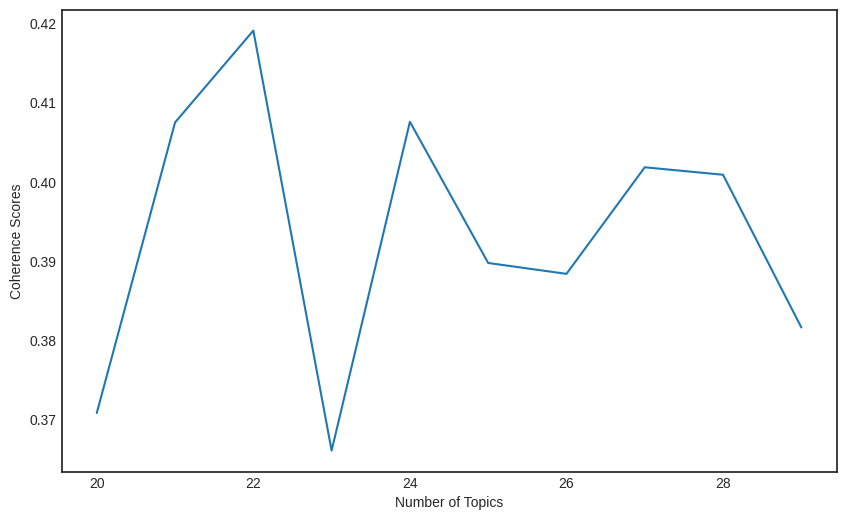

In [48]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [i for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x,coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [49]:
lda_model = LdaModel(corpus, num_topics=23, id2word=dictionary)
topics = lda_model.print_topics(num_topics=23)
topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.095*"변화" + 0.070*"인공지능" + 0.054*"다양" + 0.046*"검증" + 0.040*"기준" + 0.039*"내용" + 0.037*"확인" + 0.036*"발전" + 0.036*"의미" + 0.034*"데이터"'),
 (1,
  '0.180*"인공지능" + 0.081*"기술" + 0.076*"분석" + 0.046*"연구" + 0.042*"문제" + 0.035*"관련" + 0.031*"초록" + 0.027*"발전" + 0.025*"가능성" + 0.022*"확인"'),
 (2,
  '0.080*"데이터" + 0.076*"기술" + 0.069*"분석" + 0.045*"인공지능" + 0.045*"인" + 0.037*"서비스" + 0.032*"모델" + 0.026*"핵심" + 0.023*"구축" + 0.023*"활용"'),
 (3,
  '0.120*"인공지능" + 0.097*"설계" + 0.061*"개발" + 0.060*"문제" + 0.058*"연구" + 0.034*"해결" + 0.033*"확인" + 0.032*"사용" + 0.032*"결과" + 0.031*"시스템"'),
 (4,
  '0.085*"연구" + 0.062*"활용" + 0.043*"분석" + 0.040*"인공지능" + 0.036*"적용" + 0.033*"러닝" + 0.033*"논문" + 0.026*"선정" + 0.025*"있음" + 0.024*"과"'),
 (5,
  '0.149*"인간" + 0.092*"논문" + 0.075*"정보" + 0.075*"가능성" + 0.046*"인공지능" + 0.045*"기반" + 0.039*"검증" + 0.039*"이해" + 0.039*"관점" + 0.039*"때"'),
 (6,
  '0.109*"학습" + 0.084*"논문" + 0.073*"서비스" + 0.062*"경우" + 0.058*"알고리즘" + 0.044*"적용" + 0.044*"진행" + 0.044*"분석" + 0.042*"이용" + 0.022*"관점"'),
 (7,
  '0

In [50]:
!pip install lida fastapi==0.68.0 kaleido==0.2.1 python-multipart==0.0.5 uvicorn==0.15.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.5 MB/s eta 0:00:00
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none

In [51]:
!pip install cupy-cuda11x==11.0.0 numpy==1.20

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 17.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


In [52]:
!pip install google-colab pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [53]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model,corpus, dictionary)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.060463 -0.082213       1        1  15.704996
0      0.076007 -0.050081       2        1  10.573994
18     0.086987 -0.018936       3        1  10.100312
7      0.081106 -0.038053       4        1   9.091361
10     0.061671 -0.086228       5        1   8.186992
20     0.051548  0.070684       6        1   7.417267
22     0.006355 -0.045453       7        1   5.053850
23     0.055837 -0.033120       8        1   4.086851
17     0.050999 -0.000717       9        1   4.040501
25     0.060587 -0.011567      10        1   3.180871
19     0.128246 -0.117094      11        1   2.966810
8     -0.137764 -0.074678      12        1   2.550513
4      0.078784 -0.093614      13        1   2.273734
14     0.070878  0.143367      14        1   2.259274
1     -0.006864  0.051503      15        1   2.011519
12     0.083424 -0.175455      16        1   1.990407
6     -0.338006 -0.005142      17        1   1.823286
15     0.064094 -0.046093      18        1   1.508744
16     0.061812  0.181970      19        1   1.458605
21     0.042131  0.212310      20        1   0.983039
11     0.074014  0.124526      21        1   0.930596
2     -0.329406  0.058751      22        1   0.824300
13    -0.233364 -0.028251      23        1   0.152053
9     -0.180183 -0.046923      24        1   0.138354
3      0.027554 -0.000495      25        1   0.138354
24     0.027554 -0.000495      26        1   0.138354
26    -0.126679 -0.013839      27        1   0.138354
27     0.027554 -0.000495      28        1   0.138354
28     0.074661  0.125830      29        1   0.138354, topic_info=    Term        Freq       Total Category  logprob  loglift
71    초록   99.000000   99.000000  Default  30.0000  30.0000
14  인공지능  410.000000  410.000000  Default  29.0000  29.0000
40    기술  124.000000  124.000000  Default  28.0000  28.0000
21    교육  160.000000  160.000000  Default  27.0000  27.0000
43   데이터  107.000000  107.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
7     발전    0.058383   30.216543  Topic29  -4.4601   0.3340
44    설계    0.051500   27.772319  Topic29  -4.5855   0.2929
22    기반    0.091999   50.129303  Topic29  -4.0054   0.2825
14  인공지능    0.503306  410.555610  Topic29  -2.3059  -0.1210
8     분석    0.144782  122.858510  Topic29  -3.5519  -0.1605

[1174 rows x 6 columns], token_table=      Topic      Freq Term
term                      
72        1  0.124414   가능
72        2  0.093310   가능
72        3  0.124414   가능
72        4  0.186620   가능
72        5  0.031103   가능
...     ...       ...  ...
60       14  0.042088   활용
60       16  0.014029   활용
60       17  0.014029   활용
60       18  0.070147   활용
60       20  0.042088   활용

[1056 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 19, 8, 11, 21, 23, 24, 18, 26, 20, 9, 5, 15, 2, 13, 7, 16, 17, 22, 12, 3, 14, 10, 4, 25, 27, 28, 29])